### Styling and imports

In [198]:
%%html
<style>
    .purple {
        background-color: #e6ccff;
    }
    .green {
        background-color: #99ffdd;
    }
    .blue {
        background-color: #b3f0ff;
    }
    .yellow{
        background-color: #ffffb3;
    }
    .orange {
        background-color: #ffcc66;
    }
    .center {
        text-align: center;
    }
    .small-padding {
        padding: 5px;
    }
    .extra-padding {
        padding: 20px;
    }
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
import json
import statistics
import seaborn as sns
import csv
import os

<div class="green extra-padding">
<h1 class="center">Our question: What is the impact of air pollution and how can we improve air quality in the London Borough of Hammersmith and Fulham?</h1>
<strong>In this analysis:</strong>
<ol>
<li>What is the main cause of air pollution in the borough and what factors are influencing levels of air pollutants? E.g. times of day, month, traffic, weather, location- urban/roadside etc</li>
<li>What is the impact of air pollution on our health and the NHS?</li>
<li>What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</li>
</ol>
</div>

<div class="orange extra-padding">
    <h2>Data loading and cleaning</h2>
</div>

<div class="yellow small-padding">
    <h3>Hammersmith Air Quality data</h3>
</div>

<div class="purple small-padding">
    <h4>Fetch data from API and save to CSV</h4>
</div>

In [3]:
# These sections are commented out as the data has already been retrieved using the API
# Please load data from the saved csv 
# To test the API response, please enter an API key below

# Hammersmith coords for school near A4
# lat= '51.493096'
# lon= '-0.224079'

# API = 'ADD_API_KEY_HERE'

# # Past 3 years 
# end_date = datetime(2024, 1, 1, 12, 00, 00)
# start_date = end_date - timedelta(days=1095)

# start = int(start_date.timestamp())
# end = int(end_date.timestamp())

# response = requests.get(f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={API}')


# # Check response success
# if response.status_code == 200:
#     data = response.json()
# else:
#     print(f"Error: {response.status_code}")

In [4]:
# Data already saved
# file_path = "../data_unclean/air_pollution_data_hammersmith_3_years.csv"

# def save_to_csv(response, file_path):
#     records = []
#     for entry in response['list']:
#         record = {
#             "date_time": entry["dt"],
#             "aqi": entry["main"]["aqi"],
#             "co": entry["components"]["co"],
#             "no": entry["components"]["no"],
#             "no2": entry["components"]["no2"],
#             "o3": entry["components"]["o3"],
#             "so2": entry["components"]["so2"],
#             "pm2_5": entry["components"]["pm2_5"],
#             "pm10": entry["components"]["pm10"],
#             "nh3": entry["components"]["nh3"],
#         }
#         records.append(record)
#     aq_df = pd.DataFrame(records)
#     path = file_path
#     aq_df.to_csv(path, index=False)
#     return aq_df

# save_to_csv(response.json(), file_path)

<div class="purple small-padding">
    <h4>Load data from CSV</h4>
</div>

In [5]:
air_quality_hammersmith = pd.read_csv('data_unclean/air_pollution_data_hammersmith_3_years.csv')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1609502400,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,1609506000,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,1609509600,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,1609513200,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,1609516800,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,1609520400,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,1609524000,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,1609527600,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,1609531200,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,1609534800,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [6]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,1704078000,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,1704081600,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,1704085200,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,1704088800,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,1704092400,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,1704096000,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,1704099600,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,1704103200,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,1704106800,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,1704110400,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="purple small-padding">
    <h4>Change datetime to readable format</h4>
</div>

In [7]:
air_quality_hammersmith['date_time'] = pd.to_datetime(air_quality_hammersmith['date_time'], unit='s')
air_quality_hammersmith.head(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82
5,2021-01-01 17:00:00,2,323.77,14.53,47.30,0.04,15.74,7.85,9.31,0.71
6,2021-01-01 18:00:00,2,310.42,11.06,49.35,0.26,14.66,6.31,7.63,0.66
7,2021-01-01 19:00:00,2,307.08,8.61,50.72,0.68,15.14,6.21,7.32,0.62
8,2021-01-01 20:00:00,2,310.42,6.87,49.35,1.11,15.74,6.32,7.38,0.59
9,2021-01-01 21:00:00,2,303.75,4.92,45.24,1.97,15.14,6.00,7.15,0.56


In [8]:
air_quality_hammersmith.tail(10)

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
26007,2024-01-01 03:00:00,2,233.65,0.00,2.25,67.23,1.42,0.50,0.83,0.20
26008,2024-01-01 04:00:00,2,233.65,0.00,2.46,67.23,1.61,0.50,0.86,0.21
26009,2024-01-01 05:00:00,2,233.65,0.00,2.78,66.52,1.86,0.50,0.90,0.24
26010,2024-01-01 06:00:00,2,233.65,0.00,3.47,67.23,2.21,0.50,0.93,0.29
26011,2024-01-01 07:00:00,2,240.33,0.00,6.17,65.80,3.13,0.55,1.07,0.40
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63


<div class="yellow small-padding">
    <h3>Open Meteo Weather data</h3>
</div>

<div class="purple small-padding">
    <h4>Load Weather Data (retrieved from Open Meteo)</h4>
</div>

In [9]:
weather_data = pd.read_csv('data_unclean/weather_hammersmith.csv')
weather_data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
0,2021-01-01T00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253
1,2021-01-01T01:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261
2,2021-01-01T02:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270
3,2021-01-01T03:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270
4,2021-01-01T04:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279


In [10]:
weather_data.time = pd.to_datetime(weather_data.time)
weather_data.describe()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°)
count,26304,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2022-07-02 23:30:00,11.518891,79.015625,0.085056,0.084018,0.000727,1014.422651,14.627365,24.297354,190.498898
min,2021-01-01 00:00:00,-10.200000,17.000000,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000
25%,2021-10-01 23:45:00,7.175000,70.000000,0.000000,0.000000,0.000000,1007.800000,8.700000,16.500000,102.000000
50%,2022-07-02 23:30:00,11.400000,83.000000,0.000000,0.000000,0.000000,1015.400000,13.200000,23.200000,217.000000
75%,2023-04-02 23:15:00,16.000000,91.000000,0.000000,0.000000,0.000000,1022.100000,19.200000,30.700000,253.000000
max,2024-01-01 23:00:00,38.000000,100.000000,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000
std,NaN,6.388734,14.926841,0.372900,0.371140,0.018705,11.117060,7.569446,11.276076,93.808941


In [11]:
weather_data.isna().sum()

time                        0
temperature_2m (°C)         0
relative_humidity_2m (%)    0
precipitation (mm)          0
rain (mm)                   0
snowfall (cm)               0
surface_pressure (hPa)      0
wind_speed_10m (km/h)       0
wind_speed_100m (km/h)      0
wind_direction_10m (°)      0
dtype: int64

In [13]:
# Rename columns
weather_data = weather_data.rename(columns = {
    'time':'time',
    'temperature_2m (°C)':'temp_C', 
    'relative_humidity_2m (%)': 'percent_humidity',
    'precipitation (mm)':'precipitation',
    'rain (mm)': 'rain',
    'snowfall (cm)': 'snowfall',
    'surface_pressure (hPa)':'surface_pressure',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
    'wind_speed_100m (km/h)':'wind_speed_100m',
    'wind_direction_10m (°)':'wind_direction'
})

In [14]:
weather_data.columns

Index(['time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

<div class="purple small-padding">
    <h4>Merge weather and air quality data and get overview</h4>
</div>

In [15]:
weather_aq = pd.merge(air_quality_hammersmith, weather_data, left_on='date_time',right_on='time', how='left')

In [16]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,2021-01-01 12:00:00,1.4,92,0.0,0.0,0.0,1010.4,8.3,10.5,265
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,2021-01-01 13:00:00,2.1,91,0.0,0.0,0.0,1010.0,9.4,11.9,270
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,2021-01-01 14:00:00,2.5,91,0.0,0.0,0.0,1010.0,9.4,12.6,263
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,2021-01-01 15:00:00,2.8,92,0.0,0.0,0.0,1010.1,8.3,13.3,252
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,2021-01-01 16:00:00,2.7,95,0.0,0.0,0.0,1010.5,6.5,15.0,267


In [17]:
weather_aq.tail()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction
26012,2024-01-01 08:00:00,2,240.33,0.00,9.42,63.66,3.87,0.72,1.39,0.52,2024-01-01 08:00:00,5.9,71,0.0,0.0,0.0,1001.5,19.6,35.5,256
26013,2024-01-01 09:00:00,2,240.33,0.01,10.88,64.37,4.29,0.81,1.65,0.62,2024-01-01 09:00:00,6.4,69,0.0,0.0,0.0,1002.3,19.3,34.1,256
26014,2024-01-01 10:00:00,2,236.99,0.08,10.37,70.10,4.29,0.80,1.69,0.67,2024-01-01 10:00:00,7.1,69,0.0,0.0,0.0,1002.7,19.1,31.7,248
26015,2024-01-01 11:00:00,2,236.99,0.21,9.08,75.10,3.99,0.68,1.44,0.67,2024-01-01 11:00:00,7.8,69,0.0,0.0,0.0,1003.2,18.2,29.4,236
26016,2024-01-01 12:00:00,2,233.65,0.30,7.97,77.96,3.61,0.57,1.13,0.63,2024-01-01 12:00:00,8.4,68,0.0,0.0,0.0,1003.1,16.6,25.6,228


In [18]:
weather_aq['aqi'].value_counts()

aqi
1    14572
2     9317
3     1344
4      681
5      103
Name: count, dtype: int64

In [19]:
weather_aq['aqi'].value_counts(normalize=True)

aqi
1    0.560095
2    0.358112
3    0.051659
4    0.026175
5    0.003959
Name: proportion, dtype: float64

<div class="blue">
According to this dataset, Air quality in Hammersmith is rated 'good' 56% of the time, 44% of the time fair or below. It is 'poor' or 'moderate' over 7% of the time and 'very poor' less than one percent of the time.
</div>

In [20]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'time', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [21]:
weather_aq.shape

(26017, 20)

In [22]:
weather_aq.dtypes

date_time           datetime64[ns]
aqi                          int64
co                         float64
no                         float64
no2                        float64
o3                         float64
so2                        float64
pm2_5                      float64
pm10                       float64
nh3                        float64
time                datetime64[ns]
temp_C                     float64
percent_humidity             int64
precipitation              float64
rain                       float64
snowfall                   float64
surface_pressure           float64
wind_speed_10m             float64
wind_speed_100m            float64
wind_direction               int64
dtype: object

<div class="purple small-padding">
    <h4>Data Cleaning</h4>
</div>

In [23]:
weather_aq = weather_aq.drop(columns='time')

In [24]:
weather_aq.columns

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [25]:
# Create new columns for day, month, hour

weather_aq['day'] = weather_aq['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [26]:
weather_aq['month'] = weather_aq['date_time'].dt.month

In [27]:
weather_aq['hour'] = weather_aq['date_time'].dt.hour

In [28]:
weather_aq.head()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 12:00:00,2,320.44,13.19,46.61,2.33,28.61,16.74,17.83,1.98,...,0.0,0.0,0.0,1010.4,8.3,10.5,265,4,1,12
1,2021-01-01 13:00:00,2,323.77,15.65,43.87,2.12,24.08,16.56,17.74,1.44,...,0.0,0.0,0.0,1010.0,9.4,11.9,270,4,1,13
2,2021-01-01 14:00:00,2,323.77,17.43,43.18,1.43,21.22,15.27,16.50,1.24,...,0.0,0.0,0.0,1010.0,9.4,12.6,263,4,1,14
3,2021-01-01 15:00:00,2,327.11,18.33,44.55,0.65,19.31,13.24,14.59,1.03,...,0.0,0.0,0.0,1010.1,8.3,13.3,252,4,1,15
4,2021-01-01 16:00:00,2,330.45,17.43,45.93,0.10,17.41,10.69,12.15,0.82,...,0.0,0.0,0.0,1010.5,6.5,15.0,267,4,1,16


In [29]:
# Look for missing/anomalous data

weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26017,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,...,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000
mean,2022-07-02 09:44:53.669523712,1.555790,249.606006,6.358509,18.793544,50.661807,7.872453,6.815382,8.654816,0.885957,...,0.085175,0.084126,0.000735,1014.434466,14.640931,24.320202,190.313334,2.991967,6.530192,11.500019
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,-9999.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.700000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 12:00:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.800000,8.800000,16.500000,102.000000,1.000000,4.000000,6.000000
50%,2022-06-30 12:00:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.500000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 12:00:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.100000,19.200000,30.800000,253.000000,5.000000,10.000000,17.000000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.700000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744838,80.892569,23.804967,15.823728,69.255641,7.844575,8.264211,8.995321,1.104444,...,0.373876,0.372101,0.018808,11.136033,7.555999,11.249840,93.849017,2.002452,3.436163,6.922187


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>There are some negative values in the o3 data which is impossible. These will be counted and dealt with ..</li>
        <li>There is a large amount of variance in the data for different pollutants, particularly co and o3, however we will be mostly focussing on NO2 and pm2.5 measurements</li>
        <li>There are some 0 values in pollutants data which is also highly unlikely near such a busy road. </li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>

In [30]:
# Check and remove negative values
negative_values = weather_aq[weather_aq.o3 < 0]
len(negative_values)

1

In [31]:
# As there is only 1 negative value, this row can be deleted
weather_aq = weather_aq[weather_aq.o3 >= 0]
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,6.358238,18.793687,51.048095,7.872474,6.815534,8.655013,0.885966,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.000000,1.340000,0.000000,0.860000,0.500000,0.530000,0.000000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.000000,7.800000,30.400000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.290000,13.370000,53.640000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,1.500000,23.990000,70.810000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,23.805384,15.824015,30.235222,7.844725,8.264334,8.995438,1.104464,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [32]:
# Convert zero values for pollutants to NaN
weather_aq.iloc[:,:10] = weather_aq.iloc[:,:10].apply(lambda x: x.replace(0, np.nan), axis = 1)
weather_aq.describe()

,date_time,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
count,26016,26016.000000,26016.000000,19189.000000,26016.000000,25064.000000,26016.000000,26016.000000,26016.000000,25879.000000,...,26016.000000,26016.000000,26016.000000,26016.00000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000,26016.000000
mean,2022-07-02 09:23:22.167896576,1.555812,249.608223,8.620351,18.793687,52.987042,7.872474,6.815534,8.655013,0.890656,...,0.085178,0.084129,0.000735,1014.43454,14.641248,24.320783,190.311308,2.992005,6.530174,11.500192
min,2021-01-01 12:00:00,1.000000,141.860000,0.010000,1.340000,0.010000,0.860000,0.500000,0.530000,0.010000,...,0.000000,0.000000,0.000000,952.70000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2021-09-30 11:45:00,1.000000,205.280000,0.150000,7.800000,33.620000,3.810000,2.230000,3.310000,0.290000,...,0.000000,0.000000,0.000000,1007.80000,8.800000,16.500000,102.000000,1.000000,4.000000,5.750000
50%,2022-06-30 11:30:00,1.000000,233.650000,0.720000,13.370000,55.070000,5.660000,3.990000,5.870000,0.550000,...,0.000000,0.000000,0.000000,1015.50000,13.200000,23.200000,217.000000,3.000000,7.000000,12.000000
75%,2023-04-04 11:15:00,2.000000,270.370000,2.680000,23.990000,71.530000,9.060000,7.760000,10.420000,1.040000,...,0.000000,0.000000,0.000000,1022.10000,19.200000,30.800000,253.000000,5.000000,10.000000,17.250000
max,2024-01-01 12:00:00,5.000000,1268.390000,447.030000,126.120000,205.990000,129.700000,104.540000,108.950000,15.200000,...,14.700000,14.700000,1.400000,1044.70000,68.000000,99.800000,360.000000,6.000000,12.000000,23.000000
std,NaN,0.744845,80.893333,27.364630,15.824015,29.088648,7.844725,8.264334,8.995438,1.105496,...,0.373882,0.372107,0.018808,11.13624,7.555971,11.249665,93.850252,2.002481,3.436228,6.922264


In [33]:
# Check missing values
for column_name in weather_aq.columns:
    print(f"{column_name}: {weather_aq[column_name].isna().sum()}")


date_time: 0
aqi: 0
co: 0
no: 6827
no2: 0
o3: 952
so2: 0
pm2_5: 0
pm10: 0
nh3: 137
temp_C: 0
percent_humidity: 0
precipitation: 0
rain: 0
snowfall: 0
surface_pressure: 0
wind_speed_10m: 0
wind_speed_100m: 0
wind_direction: 0
day: 0
month: 0
hour: 0


In [34]:
# Replace missing values with mean

weather_aq['no'] = weather_aq['no'].fillna(weather_aq['no'].mean())
weather_aq['nh3'] = weather_aq['nh3'].fillna(weather_aq['nh3'].mean())
weather_aq['o3'] = weather_aq['o3'].fillna(weather_aq['o3'].mean())
weather_aq.isna().sum()

date_time           0
aqi                 0
co                  0
no                  0
no2                 0
o3                  0
so2                 0
pm2_5               0
pm10                0
nh3                 0
temp_C              0
percent_humidity    0
precipitation       0
rain                0
snowfall            0
surface_pressure    0
wind_speed_10m      0
wind_speed_100m     0
wind_direction      0
day                 0
month               0
hour                0
dtype: int64

<div class="purple small-padding">
    <h4>Save cleaned data to CSV</h4>
</div>

In [35]:
path = 'data_clean/hammersmith_clean.csv'
weather_aq.to_csv(path, index=False)

<div class="yellow small-padding">
    <h3>Hammersmith Air Quality England data</h3>
</div>

<div class="purple small-padding">
    <h4>Load data from CSVs, concatenate and clean</h4>
</div>

In [106]:
# Data had to been downloaded in separate csvs to cover the whole time period
hammersmith_21 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2021.csv')
hammersmith_22 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2022.csv')
hammersmith_23 = pd.read_csv('data_unclean/Hammersmith_air_pollution_2023.csv')

In [107]:
hammersmith_21.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [108]:
hammersmith_21 = hammersmith_21.drop([0, 1, 2, 3])

hammersmith_21.columns = hammersmith_21.iloc[0]
hammersmith_21 = hammersmith_21.drop(hammersmith_21.index[0]).reset_index(drop=True)
hammersmith_21.columns = [
    "End Date", "End Time", "PM10", "PM10 Status/units",
    "NO", "NO Status/units", "NO2", "NO2 Status/units",
    "NOXasNO2", "NOXasNO2 Status/units", "O3", "O3 Status/units",
    "PM25", "PM25 Status/units"
]
hammersmith_21.head()

,End Date,End Time,PM10,PM10 Status/units,NO,NO Status/units,NO2,NO2 Status/units,NOXasNO2,NOXasNO2 Status/units,O3,O3 Status/units,PM25,PM25 Status/units
0,01/01/2021,01:00:00,27.5,R ugm-3 (Ref.eq),20.92937,R ugm-3,38.37475,R ugm-3,70.466,R ugm-3,16.81045,R ugm-3,24.4,R ugm-3 (BAM)
1,01/01/2021,02:00:00,61.7,R ugm-3 (Ref.eq),6.0364,R ugm-3,31.40525,R ugm-3,40.66093,R ugm-3,17.71516,R ugm-3,67.4,R ugm-3 (BAM)
2,01/01/2021,03:00:00,25.8,R ugm-3 (Ref.eq),3.36416,R ugm-3,21.27606,R ugm-3,26.43437,R ugm-3,30.83357,R ugm-3,24.4,R ugm-3 (BAM)
3,01/01/2021,04:00:00,14.2,R ugm-3 (Ref.eq),3.38563,R ugm-3,21.6773,R ugm-3,26.86853,R ugm-3,28.39881,R ugm-3,14.4,R ugm-3 (BAM)
4,01/01/2021,05:00:00,19.2,R ugm-3 (Ref.eq),3.0349,R ugm-3,20.14869,R ugm-3,24.80214,R ugm-3,29.4715,R ugm-3,19.4,R ugm-3 (BAM)


In [109]:
hammersmith_22.head()

,Data download from AQ England website,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
4,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units


In [110]:
hammersmith_22 = hammersmith_22.drop([0, 1, 2, 3])

hammersmith_22.columns = hammersmith_22.iloc[0]
hammersmith_22 = hammersmith_22.drop(hammersmith_22.index[0]).reset_index(drop=True)
hammersmith_22.columns = [
    "End Date", "End Time", "PM10", "PM10 Status/units",
    "NO", "NO Status/units", "NO2", "NO2 Status/units",
    "NOXasNO2", "NOXasNO2 Status/units", "O3", "O3 Status/units",
    "PM25", "PM25 Status/units"
]
hammersmith_22.head()

,End Date,End Time,PM10,PM10 Status/units,NO,NO Status/units,NO2,NO2 Status/units,NOXasNO2,NOXasNO2 Status/units,O3,O3 Status/units,PM25,PM25 Status/units
0,01/01/2022,01:00:00,25,R ugm-3 (Ref.eq),12.51919,R ugm-3,14.0019,R ugm-3,33.19773,R ugm-3,24.50886,R ugm-3,17,R ugm-3 (BAM)
1,01/01/2022,02:00:00,20.8,R ugm-3 (Ref.eq),10.44011,R ugm-3,11.78449,R ugm-3,27.79244,R ugm-3,NaN,NaN,10,R ugm-3 (BAM)
2,01/01/2022,03:00:00,16.7,R ugm-3 (Ref.eq),7.9662,R ugm-3,9.57374,R ugm-3,21.7884,R ugm-3,26.60892,R ugm-3,9,R ugm-3 (BAM)
3,01/01/2022,04:00:00,15.8,R ugm-3 (Ref.eq),4.87049,R ugm-3,5.53982,R ugm-3,13.00781,R ugm-3,30.71437,R ugm-3,6,R ugm-3 (BAM)
4,01/01/2022,05:00:00,14.2,R ugm-3 (Ref.eq),5.93563,R ugm-3,8.68479,R ugm-3,17.78597,R ugm-3,33.89048,R ugm-3,3,R ugm-3 (BAM)


In [111]:
hammersmith_23.head()

,End Date,End Time,PM10,Status/units,NO,Status/units.1,NO2,Status/units.2,NOXasNO2,Status/units.3,O3,Status/units.4,PM25,Status/units.5,Unnamed: 14
0,01/01/2023,01:00:00,14.2,R ugm-3 (Ref.eq),2.76395,R ugm-3,6.13576,R ugm-3,10.37376,R ugm-3,75.08183,R ugm-3,9.0,R ugm-3 (BAM),NaN
1,01/01/2023,02:00:00,12.5,R ugm-3 (Ref.eq),2.99566,R ugm-3,7.11976,R ugm-3,11.71304,R ugm-3,NaN,NaN,7.0,R ugm-3 (BAM),NaN
2,01/01/2023,03:00:00,14.2,R ugm-3 (Ref.eq),2.59177,R ugm-3,7.22349,R ugm-3,11.19748,R ugm-3,74.64906,R ugm-3,6.0,R ugm-3 (BAM),NaN
3,01/01/2023,04:00:00,16.7,R ugm-3 (Ref.eq),3.53521,R ugm-3,5.82500,R ugm-3,11.24558,R ugm-3,77.11490,R ugm-3,13.0,R ugm-3 (BAM),NaN
4,01/01/2023,05:00:00,17.5,R ugm-3 (Ref.eq),1.55490,R ugm-3,6.46746,R ugm-3,8.85160,R ugm-3,76.83475,R ugm-3,10.0,R ugm-3 (BAM),NaN


In [112]:
hammersmith_23 = hammersmith_23.rename(columns={'Status/units':'PM10 Status/units','Status/units.1':'NO Status/units','Status/units.2':'NO2 Status/units',
                               'Status/units.3':'NOXasNO2 Status/units','Status/units.4':'O3 Status/units','Status/units.5':'PM25 Status/units'})
hammersmith_23 = hammersmith_23.drop(columns='Unnamed: 14')
hammersmith_23.columns

Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [113]:
hammersmith_verified = pd.concat([hammersmith_21,hammersmith_22, hammersmith_23])
hammersmith_verified.columns


Index(['End Date', 'End Time', 'PM10', 'PM10 Status/units', 'NO',
       'NO Status/units', 'NO2', 'NO2 Status/units', 'NOXasNO2',
       'NOXasNO2 Status/units', 'O3', 'O3 Status/units', 'PM25',
       'PM25 Status/units'],
      dtype='object')

In [114]:
hammersmith_verified = hammersmith_verified.drop(columns=['PM10 Status/units', 'NO Status/units', 'NO2 Status/units',
                                                          'NOXasNO2 Status/units','O3 Status/units','PM25 Status/units'])
hammersmith_verified.columns

Index(['End Date', 'End Time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25'], dtype='object')

In [115]:
hammersmith_verified = hammersmith_verified.rename(columns = {'End Date':'date','End Time':'time'})
hammersmith_verified.head(30)

,date,time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,01/01/2021,01:00:00,27.5,20.92937,38.37475,70.466,16.81045,24.4
1,01/01/2021,02:00:00,61.7,6.0364,31.40525,40.66093,17.71516,67.4
2,01/01/2021,03:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4
3,01/01/2021,04:00:00,14.2,3.38563,21.6773,26.86853,28.39881,14.4
4,01/01/2021,05:00:00,19.2,3.0349,20.14869,24.80214,29.4715,19.4
5,01/01/2021,06:00:00,20.8,3.82942,21.27712,27.14881,28.71812,22.4
6,01/01/2021,07:00:00,10.8,4.33762,17.10154,23.75246,30.36957,17.4
7,01/01/2021,08:00:00,12.5,4.44499,23.43834,30.25389,26.81722,20.4
8,01/01/2021,09:00:00,15,5.58665,23.81465,32.38073,26.66255,15.4
9,01/01/2021,10:00:00,20.8,6.01612,22.81541,32.03999,28.01963,19.4


In [116]:
nans = hammersmith_verified.isna().sum()
nans

# There are some nans in date and time so these must be removed

date           3
time           6
PM10        3404
NO          2133
NO2         2144
NOXasNO2    2144
O3          3425
PM25        2901
dtype: int64

In [117]:
hammersmith_verified = hammersmith_verified.dropna(subset=['date', 'time'])
nans = hammersmith_verified.isna().sum()
nans

date           0
time           0
PM10        3398
NO          2127
NO2         2138
NOXasNO2    2138
O3          3419
PM25        2895
dtype: int64

In [118]:
# Need to deal with nan values in this data but need to do further cleaning first

In [119]:
# Some times are in incorrect format 24:00:00 so these need to be changed to perform strptime function
hammersmith_verified['time'] = ['23:59:59' if x == '24:00:00' else x for x in hammersmith_verified['time']]


In [120]:
# create new date_time column
hammersmith_verified['date_time'] = hammersmith_verified['date'] + ' ' + hammersmith_verified['time']


In [121]:
# format date time
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda row: datetime.strptime(row, '%d/%m/%Y %H:%M:%S'))

In [122]:
# time was end time so subtract 1 hour from each time to match original data

hammersmith_verified['date_time'] = pd.to_datetime(hammersmith_verified['date_time'])
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(lambda dt: dt - timedelta(hours=1) if pd.notnull(dt) else dt)


In [123]:
# change 22:59:59 back to 23:00:00
hammersmith_verified['date_time'] = hammersmith_verified['date_time'].apply(
    lambda dt: dt.replace(hour=23, minute=0, second=0) if dt.time() == datetime.strptime('22:59:59', '%H:%M:%S').time() else dt
)

In [124]:
hammersmith_verified = hammersmith_verified.drop(columns = ['date', 'time'])
hammersmith_verified.head()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
0,27.5,20.92937,38.37475,70.466,16.81045,24.4,2021-01-01 00:00:00
1,61.7,6.0364,31.40525,40.66093,17.71516,67.4,2021-01-01 01:00:00
2,25.8,3.36416,21.27606,26.43437,30.83357,24.4,2021-01-01 02:00:00
3,14.2,3.38563,21.6773,26.86853,28.39881,14.4,2021-01-01 03:00:00
4,19.2,3.0349,20.14869,24.80214,29.4715,19.4,2021-01-01 04:00:00


<div class="purple small-padding">
    <h4>Dealing with anomalous and NaN values</h4>
</div>

In [125]:
hammersmith_verified.dtypes

PM10                 object
NO                   object
NO2                  object
NOXasNO2             object
O3                   object
PM25                 object
date_time    datetime64[ns]
dtype: object

In [126]:
hammersmith_verified = hammersmith_verified.astype({
    'PM10': 'float',
    'NO': 'float',
    'NO2': 'float',
    'NOXasNO2': 'float',
    'O3': 'float',
    'PM25': 'float',
    'date_time':'datetime64[ns]'
})

In [127]:
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,22882.000000,24153.000000,24142.000000,24142.000000,22861.000000,23385.000000,26280
mean,19.342946,37.298966,42.923208,99.656075,34.943669,9.800855,2022-07-02 11:30:00
min,-3.300000,0.033990,0.510530,1.442470,-0.883850,-6.000000,2021-01-01 00:00:00
25%,10.800000,6.810790,20.779097,32.239455,18.080440,5.000000,2021-10-01 17:45:00
50%,15.800000,18.870750,37.263005,67.329230,34.586130,7.400000,2022-07-02 11:30:00
75%,23.300000,50.240070,59.708610,138.043785,50.295880,12.400000,2023-04-02 05:15:00
max,243.300000,520.730190,300.888520,1014.158120,122.373530,179.000000,2023-12-31 23:00:00
std,13.755722,46.841140,28.091629,94.418977,20.932881,8.973716,NaN


In [128]:
# Remove negative values
hammersmith_verified = hammersmith_verified[(hammersmith_verified.PM10>0)&(hammersmith_verified.O3>0)&(hammersmith_verified.PM25>0)]
hammersmith_verified.describe()

,PM10,NO,NO2,NOXasNO2,O3,PM25,date_time
count,19947.000000,19898.000000,19893.000000,19893.000000,19947.000000,19947.000000,19947
mean,20.092661,38.628257,44.221077,103.070381,34.236654,10.092335,2022-06-27 03:44:39.019401216
min,0.800000,0.033990,0.510530,1.442470,0.021350,0.400000,2021-01-01 00:00:00
25%,11.700000,7.406950,22.223030,34.571110,17.046975,5.000000,2021-08-16 17:30:00
50%,16.700000,20.893650,39.200270,72.218050,33.671850,8.000000,2022-05-24 04:00:00
75%,24.200000,52.633463,60.969300,143.151050,49.601875,12.400000,2023-04-16 04:30:00
max,243.300000,449.167590,300.888520,956.983800,122.373530,170.400000,2023-12-31 23:00:00
std,14.027523,46.428661,27.866776,93.947105,20.912689,8.747288,NaN


In [129]:
# set DateTimeIndex
hammersmith_verified.set_index('date_time', inplace=True)


In [130]:
# Use interpolation to fill nan values
hammersmith_interpolated = hammersmith_verified.interpolate(method='time')
# Check this has worked
nans = hammersmith_interpolated.isna().sum()
nans

PM10        0
NO          0
NO2         0
NOXasNO2    0
O3          0
PM25        0
dtype: int64

In [131]:
# Save changes to original df
hammersmith_verified = hammersmith_interpolated
hammersmith_verified = hammersmith_verified.reset_index()
hammersmith_verified.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25
0,2021-01-01 00:00:00,27.5,20.92937,38.37475,70.46600,16.81045,24.4
1,2021-01-01 01:00:00,61.7,6.03640,31.40525,40.66093,17.71516,67.4
2,2021-01-01 02:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4
3,2021-01-01 03:00:00,14.2,3.38563,21.67730,26.86853,28.39881,14.4
4,2021-01-01 04:00:00,19.2,3.03490,20.14869,24.80214,29.47150,19.4


In [132]:
hammersmith_verified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  19947 non-null  datetime64[ns]
 1   PM10       19947 non-null  float64       
 2   NO         19947 non-null  float64       
 3   NO2        19947 non-null  float64       
 4   NOXasNO2   19947 non-null  float64       
 5   O3         19947 non-null  float64       
 6   PM25       19947 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.1 MB


<div class="purple small-padding">
    <h4>Save dataframe to csv and create alternative df</h4>
</div>

In [133]:
path = 'data_clean/hammersmith_verified_clean.csv'
hammersmith_verified.to_csv(path, index=False)

In [134]:
weather_aq_AQE = pd.merge(hammersmith_verified, weather_data, left_on='date_time', right_on='time')
weather_aq_AQE.columns

Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction'],
      dtype='object')

In [135]:
# Create new columns for day, month, hour

weather_aq_AQE['day'] = weather_aq_AQE['date_time'].dt.dayofweek
# The day of the week with Monday=0, Sunday=6.

In [136]:
weather_aq_AQE['month'] = weather_aq_AQE['date_time'].dt.month

In [137]:
weather_aq_AQE['hour'] = weather_aq_AQE['date_time'].dt.hour

In [138]:
weather_aq_AQE.head()

,date_time,PM10,NO,NO2,NOXasNO2,O3,PM25,time,temp_C,percent_humidity,precipitation,rain,snowfall,surface_pressure,wind_speed_10m,wind_speed_100m,wind_direction,day,month,hour
0,2021-01-01 00:00:00,27.5,20.92937,38.37475,70.46600,16.81045,24.4,2021-01-01 00:00:00,-0.1,96,0.0,0.0,0.0,1007.8,3.8,7.6,253,4,1,0
1,2021-01-01 01:00:00,61.7,6.03640,31.40525,40.66093,17.71516,67.4,2021-01-01 01:00:00,-0.7,97,0.0,0.0,0.0,1008.0,4.7,10.5,261,4,1,1
2,2021-01-01 02:00:00,25.8,3.36416,21.27606,26.43437,30.83357,24.4,2021-01-01 02:00:00,-1.1,98,0.0,0.0,0.0,1008.3,5.0,12.7,270,4,1,2
3,2021-01-01 03:00:00,14.2,3.38563,21.67730,26.86853,28.39881,14.4,2021-01-01 03:00:00,-1.7,97,0.0,0.0,0.0,1008.7,6.1,14.0,270,4,1,3
4,2021-01-01 04:00:00,19.2,3.03490,20.14869,24.80214,29.47150,19.4,2021-01-01 04:00:00,-2.3,97,0.0,0.0,0.0,1008.7,6.9,14.7,279,4,1,4


<div class="yellow small-padding">
    <h3>Emissions data</h3>
</div>

In [147]:
laei_df = pd.read_excel('data_unclean/LAEI-2019-Emissions-Summary-including-Forecast.xlsx', sheet_name='Emissions by Grid ID')

In [148]:
laei_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [149]:
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  699120 non-null  int64  
 1   Grid ID 2019          699120 non-null  int64  
 2   LAEI 1km2 ID          699120 non-null  int64  
 3   Easting               699120 non-null  int64  
 4   Northing              699120 non-null  int64  
 5   Borough               699120 non-null  object 
 6   Zone                  699120 non-null  object 
 7   Main Source Category  699120 non-null  object 
 8   Sector                699120 non-null  object 
 9   Source                699120 non-null  object 
 10  bap                   162620 non-null  float64
 11  cd                    128020 non-null  float64
 12  c4h6                  186840 non-null  float64
 13  c6h6                  217980 non-null  float64
 14  ch4                   266420 non-null  float64
 15  

In [150]:
# Changing all columns to upper case
laei_df.columns = laei_df.columns.str.upper()
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2.5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [151]:
# Renaming PM2.5 column to remove '.'
laei_df = laei_df.rename(columns = {'PM2.5':'PM2_5'})
laei_df.columns.values

array(['YEAR', 'GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING',
       'BOROUGH', 'ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE',
       'BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO', 'CO2', 'HC', 'HCL', 'HG',
       'N2O', 'NH3', 'NMVOC', 'NOX', 'PB', 'PCB', 'PM10', 'PM2_5', 'SO2',
       'EMISSIONS UNIT'], dtype=object)

In [152]:
# Removing columns not needed for analysis 
laei_df.drop(columns=['GRID ID 2019', 'LAEI 1KM2 ID', 'EASTING', 'NORTHING','BAP', 'CD', 'C4H6', 'C6H6', 'CH4', 'CO2', 'HC', 'HCL', 'HG', 'NH3', 'NMVOC', 'PB', 
                       'PCB', 'SO2'], inplace=True )
laei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699120 entries, 0 to 699119
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  699120 non-null  int64  
 1   BOROUGH               699120 non-null  object 
 2   ZONE                  699120 non-null  object 
 3   MAIN SOURCE CATEGORY  699120 non-null  object 
 4   SECTOR                699120 non-null  object 
 5   SOURCE                699120 non-null  object 
 6   CO                    266420 non-null  float64
 7   N2O                   186840 non-null  float64
 8   NOX                   595656 non-null  float64
 9   PM10                  681820 non-null  float64
 10  PM2_5                 681820 non-null  float64
 11  EMISSIONS UNIT        699120 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 64.0+ MB


In [153]:
# Removing rows not needed for analysis 

# We will not be looking at data fo 2025 and 2030 and also data for NON-GLA

laei_df.shape #check intial number of records(rows)

laei_df = laei_df.loc[laei_df['YEAR'] != 2030]
laei_df = laei_df.loc[laei_df['YEAR'] != 2025]
laei_df = laei_df.loc[laei_df['BOROUGH'] != 'Non GLA']

laei_df.shape #check final number of records(rows)

(293048, 12)

In [154]:
# Brief look at statistics for each year
laei_df[laei_df['YEAR'] == 2019].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,101948.0,36750.000000,24500.000000,87248.000000,99498.000000,99498.000000
mean,2019.0,0.514589,0.023569,0.409131,0.075312,0.033473
std,0.0,7.153357,0.979916,5.397396,0.808104,0.192679
min,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,0.000001,0.000010,0.002874,0.001335,0.000765
75%,2019.0,0.151666,0.002160,0.126147,0.024074,0.013797
max,2019.0,837.234049,107.050000,1000.194271,114.906839,21.364992


In [155]:
laei_df[laei_df['YEAR'] == 2016].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2016.0,0.458478,0.018064,0.540761,0.083738,0.037756
std,0.0,7.823388,0.902031,5.914221,0.771056,0.204585
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,0.000000,0.000000,0.003124,0.001077,0.000643
75%,2016.0,0.091148,0.000411,0.200184,0.029067,0.017324
max,2016.0,846.284267,106.900000,1021.816850,116.908248,23.070241


In [156]:
laei_df[laei_df['YEAR'] == 2013].describe()

,YEAR,CO,N2O,NOX,PM10,PM2_5
count,95550.0,44100.000000,34300.000000,80850.000000,93100.000000,93100.000000
mean,2013.0,0.394287,0.013043,0.585903,0.084075,0.041555
std,0.0,6.481300,0.607326,4.306888,0.784030,0.193527
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,0.000000,0.000000,0.003206,0.000904,0.000603
75%,2013.0,0.079476,0.000367,0.221821,0.029223,0.017891
max,2013.0,821.646048,69.649867,443.909781,132.712137,23.070241


<div class="blue small-padding">
    <strong>Observations/notes</strong>
    <ul>
        <li>Due to the nature of the data set there are many 0 values for all pollutants which causes intial statistics to look highly skewed. 
</li>
        <li>This is because the data for each borough was broken down into grids and for each grid every possible source of emission was recorded for every pollutant. </li>
        <li>For example if heat emission led to the production of pm2.5 only in one grid, all the other pollutants were recorded as 0. </li>
    </ul>
</div>

In [157]:
# Checking for NaN values
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                         0
BOROUGH                      0
ZONE                         0
MAIN SOURCE CATEGORY         0
SECTOR                       0
SOURCE                       0
CO                      168098
N2O                     199948
NOX                      44100
PM10                      7350
PM2_5                     7350
EMISSIONS UNIT               0
dtype: int64


In [158]:
# Due to nature of the data, there are many NaN avlues for each pollutant. NaN values will be replaced with 0.

laei_df.CO = laei_df.CO.fillna(0)
laei_df.N2O = laei_df.N2O.fillna(0)
laei_df.NOX = laei_df.NOX.fillna(0)
laei_df.PM10 = laei_df.PM10.fillna(0)
laei_df.PM2_5 = laei_df.PM2_5.fillna(0)

In [159]:
missing_values = laei_df.isnull().sum()
print(missing_values)

YEAR                    0
BOROUGH                 0
ZONE                    0
MAIN SOURCE CATEGORY    0
SECTOR                  0
SOURCE                  0
CO                      0
N2O                     0
NOX                     0
PM10                    0
PM2_5                   0
EMISSIONS UNIT          0
dtype: int64


<div class="blue extra-padding">
    <strong>Observations/notes:</strong>
<p>
Both the Domestic category and Industrial & Commerical category have a sector called Heat and Power generation which can get confusing when we are carrying out sector level analysis. So these values will be udpated to differentiate them.
    
</p>

</div>

In [160]:
laei_df['SECTOR'] = laei_df.apply(lambda row: 'Dom Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Domestic') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()
laei_df['SECTOR'] = laei_df.apply(lambda row: 'I&C Heat and Power Generation' if (row['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial') & (row['SECTOR'] == 'Heat and Power Generation') else (row['SECTOR']), axis=1).tolist()

<div class="purple small-padding">
    <h4>Saving Clean Data to CSV File</h4>
</div>

In [161]:
laei_df.to_csv('data_clean/clean_LAEI_data.csv', encoding='utf-8')

<div class="yellow small-padding">
    <h3>______ data</h3>
</div>

<div class="yellow small-padding">
    <h3>______ data</h3>
</div>

<div class="yellow small-padding">
    <h3>______ data</h3>
</div>

<div class="yellow small-padding">
    <h3>______ data</h3>
</div>

<div class="yellow small-padding">
    <h3>______ data</h3>
</div>

<div class="orange extra-padding">
    <h2>1. What is the main cause of air pollution in the borough and what factors are influencing levels of pollutants?</h2>
</div>

<div class="yellow small-padding">
    <h3>a) What are the sources of air pollution across the capital?</h3>
</div>

<div class="purple small-padding">
    <h4>Group data for visualisation</h4>
</div>

In [162]:

grouped_laei_2019 = laei_df[laei_df['YEAR'] == 2019].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2019['YEAR'] = 2019
grouped_laei_2019

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2019   
                                                     Dom Heat and Power Generation Gas Combustion             2019   
                                                                                   Oil/Coal Combustion        2019   
                                                     Machinery                     Household and Garden NRMM  2019   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2019   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel               2019   
                                                                                   PHV - Electric             2019   
                                                                                   PHV - Petrol               2019   
                                                                                   Taxi                       2019   
                                                                                   TfL Bus                    2019   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             73.739099   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  52.751259   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                PHV - Diesel                0.000000   
                                                                                   PHV - Electric              0.000000   
                                                                                   PHV - Petrol                0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.283612   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003451   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [163]:
grouped_laei_2016 = laei_df[laei_df['YEAR'] == 2016].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2016['YEAR'] = 2016
grouped_laei_2016

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2016   
                                                     Dom Heat and Power Generation Gas Combustion             2016   
                                                                                   Oil/Coal Combustion        2016   
                                                     Machinery                     Household and Garden NRMM  2016   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2016   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2016   
                                                                                   Motorcycle                 2016   
                                                                                   Non-TfL Bus / Coach        2016   
                                                                                   Taxi                       2016   
                                                                                   TfL Bus                    2016   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.875453   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  51.395698   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268752   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003362   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

In [164]:
grouped_laei_2013 = laei_df[laei_df['YEAR'] == 2013].groupby(['BOROUGH','ZONE', 'MAIN SOURCE CATEGORY', 'SECTOR', 'SOURCE']).sum()
grouped_laei_2013['YEAR'] = 2013
grouped_laei_2013

YEAR  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                            
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               2013   
                                                     Dom Heat and Power Generation Gas Combustion             2013   
                                                                                   Oil/Coal Combustion        2013   
                                                     Machinery                     Household and Garden NRMM  2013   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         2013   
...                                                                                                            ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol               2013   
                                                                                   Motorcycle                 2013   
                                                                                   Non-TfL Bus / Coach        2013   
                                                                                   Taxi                       2013   
                                                                                   TfL Bus                    2013   

                                                                                                                     CO  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                 
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning                0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             69.908765   
                                                                                   Oil/Coal Combustion         0.000000   
                                                     Machinery                     Household and Garden NRMM  50.550130   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking          0.000000   
...                                                                                                                 ...   
Wandsworth           Outer Transport                 Road Transport                LGV - Petrol                0.000000   
                                                                                   Motorcycle                  0.000000   
                                                                                   Non-TfL Bus / Coach         0.000000   
                                                                                   Taxi                        0.000000   
                                                                                   TfL Bus                     0.000000   

                                                                                                                   N2O  \
BOROUGH              ZONE  MAIN SOURCE CATEGORY      SECTOR                        SOURCE                                
Barking and Dagenham Outer Domestic                  Biomass                       Wood Burning               0.000000   
                                                     Dom Heat and Power Generation Gas Combustion             0.268880   
                                                                                   Oil/Coal Combustion        0.000000   
                                                     Machinery                     Household and Garden NRMM  0.003307   
                           Industrial and Commercial Commercial Cooking            Commercial Cooking         0.000000   
...                                                                                                                ...   

<div class="purple small-padding">
    <h4>Visualisations</h4>
</div>

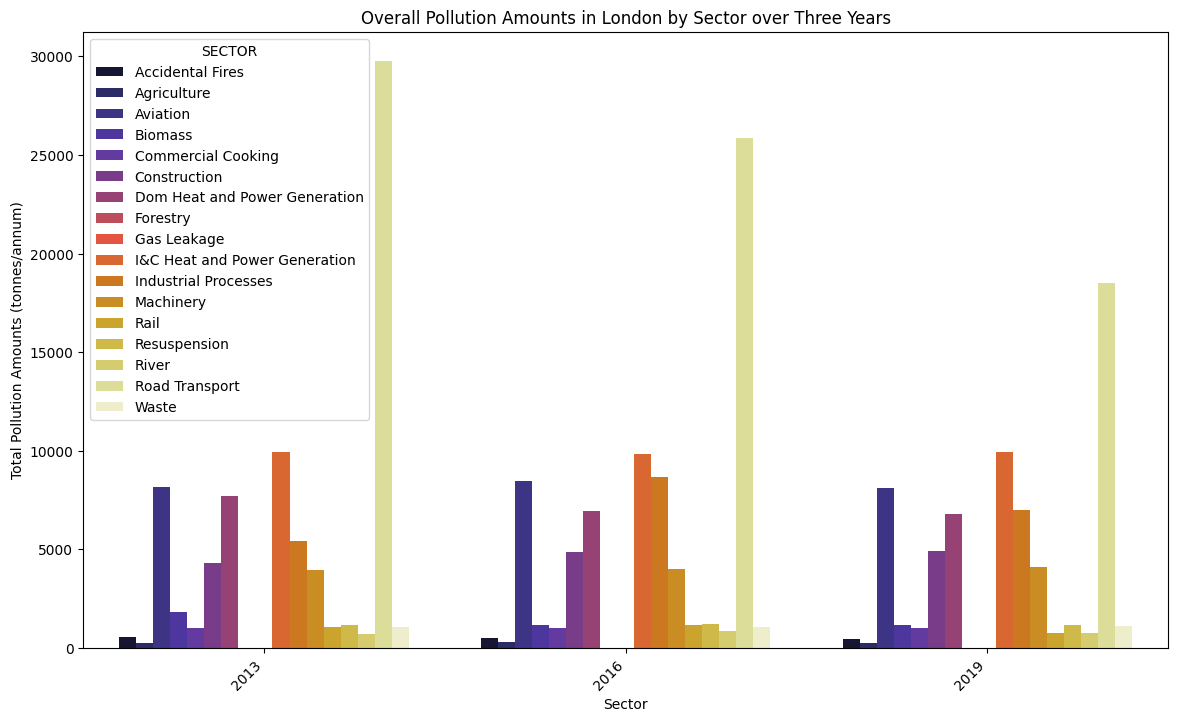

In [166]:
# List of specific pollutants
specific_pollutants = ['NOX', 'N2O', 'CO', 'PM10', 'PM2_5']

# Sum of the concentrations of the specified pollutants for each sector per year
grouped_laei_2019['TOTAL POLLUTION'] = grouped_laei_2019[specific_pollutants].sum(axis=1)
laei_2019_sector = grouped_laei_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2019_sector['YEAR'] = 2019

grouped_laei_2016['TOTAL POLLUTION'] = grouped_laei_2016[specific_pollutants].sum(axis=1)
laei_2016_sector = grouped_laei_2016.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2016_sector['YEAR'] = 2016

grouped_laei_2013['TOTAL POLLUTION'] = grouped_laei_2013[specific_pollutants].sum(axis=1)
laei_2013_sector = grouped_laei_2013.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()
laei_2013_sector['YEAR'] = 2013


# Combining the data into one dataframe
combined_data = pd.concat([laei_2019_sector, laei_2016_sector, laei_2013_sector])

# Plotting the overall pollution concentrations for each sector per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>The above graph shows that Road Transportation is the major cause of air pollution within London</li>
        <li>Additionally, Heat and Power generation for industry/commercial purposes and Industrial Processes combined also contribute significantly to overall air pollution within London</li>
        <li>Overall, air pollution amounts decreased significantly for Road Transportation between 2013 to 2019</li>
        <li>Unfortunately we do not have access to more up-to-date data to assess if the trend has continued</li>
    </ul>
</div>

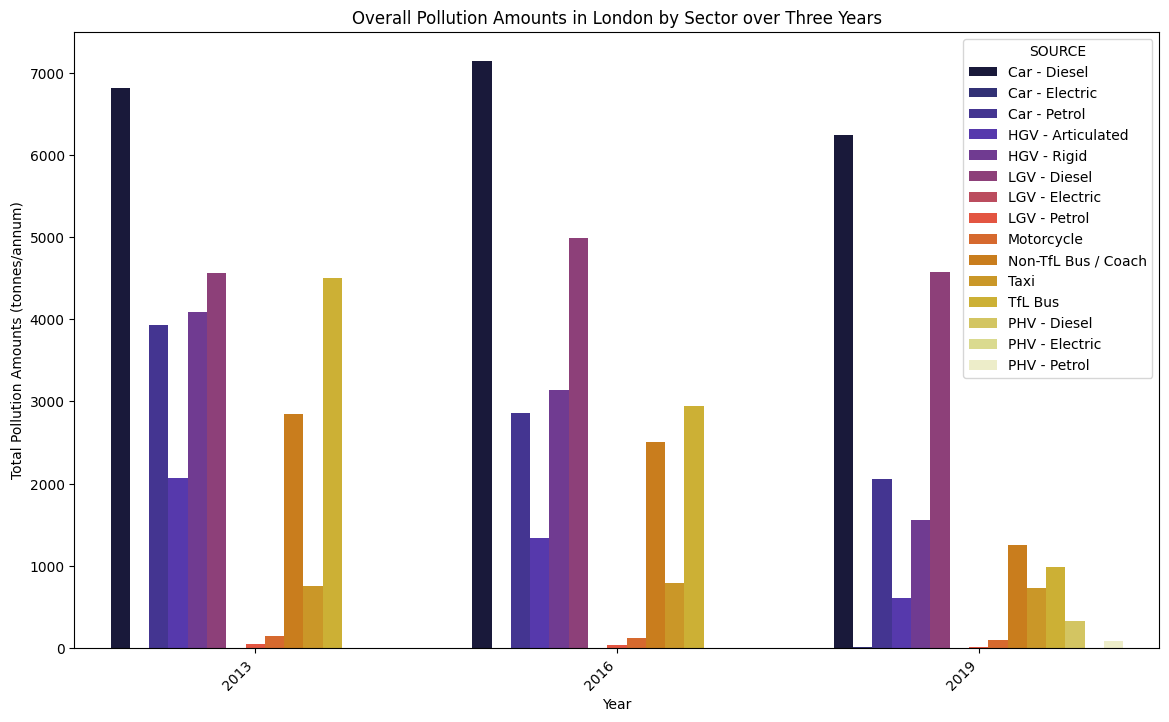

In [167]:
# Sum of the concentrations of the specified pollutants for road transport sources per year
grouped_df_2019 = grouped_laei_2019.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2019 = grouped_df_2019[grouped_df_2019['SECTOR'] == 'Road Transport']
road_transport_2019.loc[:, 'YEAR'] = 2019

grouped_df_2016 = grouped_laei_2016.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2016 = grouped_df_2016[grouped_df_2016['SECTOR'] == 'Road Transport']
road_transport_2016.loc[:, 'YEAR'] = 2016

grouped_df_2013 = grouped_laei_2013.groupby(['SECTOR', 'SOURCE']).sum().reset_index()
road_transport_2013 = grouped_df_2013[grouped_df_2013['SECTOR'] == 'Road Transport']
road_transport_2013.loc[:, 'YEAR'] = 2013

# Combining the data into one dataframe
combined_data = pd.concat([road_transport_2019, road_transport_2016, road_transport_2013])

# Plotting the overall pollution concentrations for each source per year
plt.figure(figsize=(14, 8))
sns.barplot(x=combined_data['YEAR'], y=combined_data['TOTAL POLLUTION'], hue=combined_data['SOURCE'], palette='CMRmap')
plt.xlabel('Year')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in London by Sector over Three Years')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Diesel vehicles were the biggest polluters between 2013 and 2019</li>
        <li>Diesel cars were polluting less in 2019</li>
        <li>More up-to-date data is needed to see if schemes such as ULEZ have helped to reduce this further</li>
        <li>We will use air quality data fro London to assess the impact of ULEZ from 2019 later on</li>
        <li>TFL and non-TFL buses became significantly cleaner over time</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>b) What are the biggest sources of air pollution in Hammersmith specifically?</h3>
</div>

In [175]:
# Isolating Hammersmith and Fulham data
hammersmith_fulham_2019 = laei_df[(laei_df['BOROUGH'] == 'Hammersmith and Fulham') & (laei_df['YEAR'] == 2019)]
hammersmith_fulham_2019.head()

,YEAR,BOROUGH,ZONE,MAIN SOURCE CATEGORY,SECTOR,SOURCE,CO,N2O,NOX,PM10,PM2_5,EMISSIONS UNIT
288077,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.024746,0.024746,tonnes/annum
288081,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.003116,0.003116,tonnes/annum
288094,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.655945,0.655945,tonnes/annum
288111,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.385184,0.385184,tonnes/annum
288112,2019,Hammersmith and Fulham,Inner,Domestic,Biomass,Wood Burning,0.0,0.0,0.0,0.279966,0.279966,tonnes/annum


In [180]:
# Creation dataframe for plotting
hammersmith_fulham_2019_copy = hammersmith_fulham_2019.copy()

hammersmith_fulham_2019_copy['TOTAL POLLUTION'] = hammersmith_fulham_2019_copy[specific_pollutants].sum(axis=1)
category_hammersmith_fulham_2019 = hammersmith_fulham_2019_copy.groupby('MAIN SOURCE CATEGORY')['TOTAL POLLUTION'].sum().reset_index()


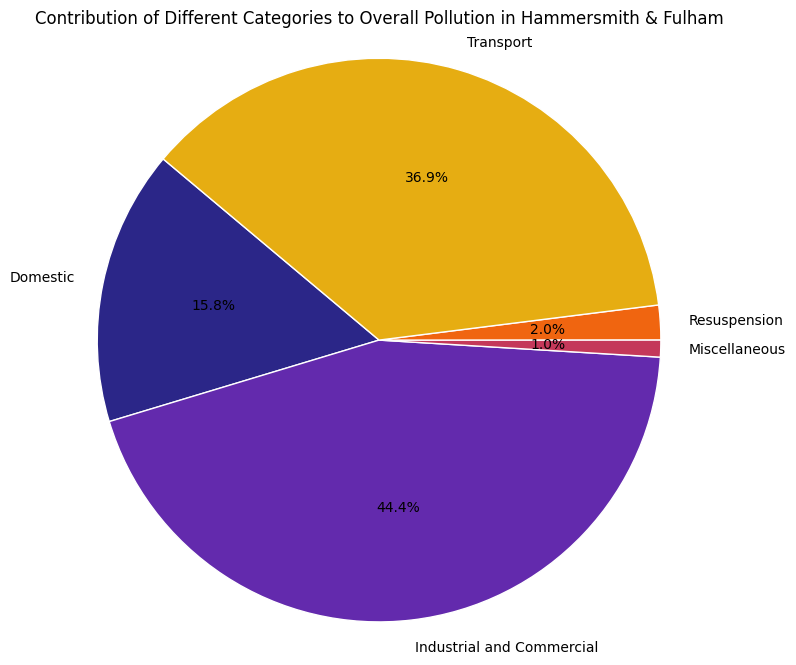

In [182]:
# Create the pie chart to show split of air pollution sources across the main categories
plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('CMRmap') 
plt.pie(category_hammersmith_fulham_2019['TOTAL POLLUTION'], labels=category_hammersmith_fulham_2019['MAIN SOURCE CATEGORY'], autopct='%1.1f%%', startangle=140, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=palette_color)
plt.title('Contribution of Different Categories to Overall Pollution in Hammersmith & Fulham')
plt.axis('equal')
plt.show()

<div class="blue small-padding">
    <strong>Observations/notes</strong>
    <ul>
        <li>The main sources of air pollution within the borough of Hammersmith & Fulham are Industrial and Commercial sources followed by Transport sources</li>
        <li>See following visualisations for more detail</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>c) How are Industrial and Commercial indutries contributing to air pollution?</h3>
</div>

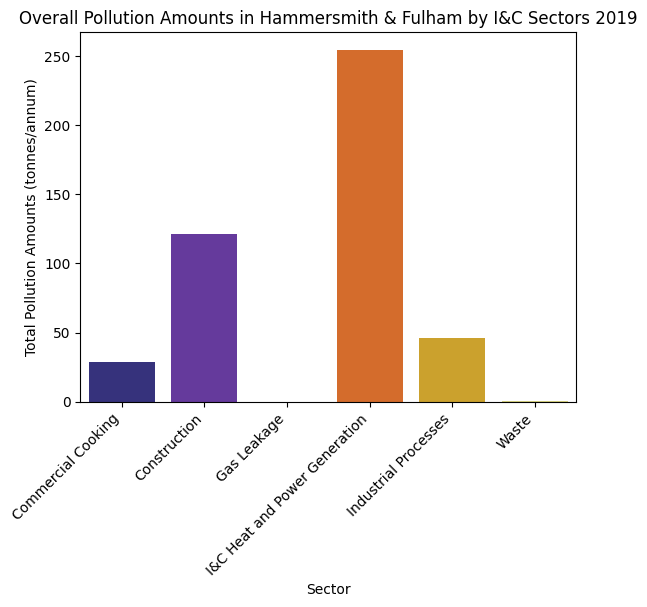

In [183]:
# Creation of dataframe for plotting
IC_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['MAIN SOURCE CATEGORY'] == 'Industrial and Commercial']
IC_hammersmith_fulham_sector_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
sns.barplot(x=IC_hammersmith_fulham_sector_2019['SECTOR'], y=IC_hammersmith_fulham_sector_2019['TOTAL POLLUTION'], hue=IC_hammersmith_fulham_sector_2019['SECTOR'], palette='CMRmap')
plt.xlabel('Sector')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by I&C Sectors 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

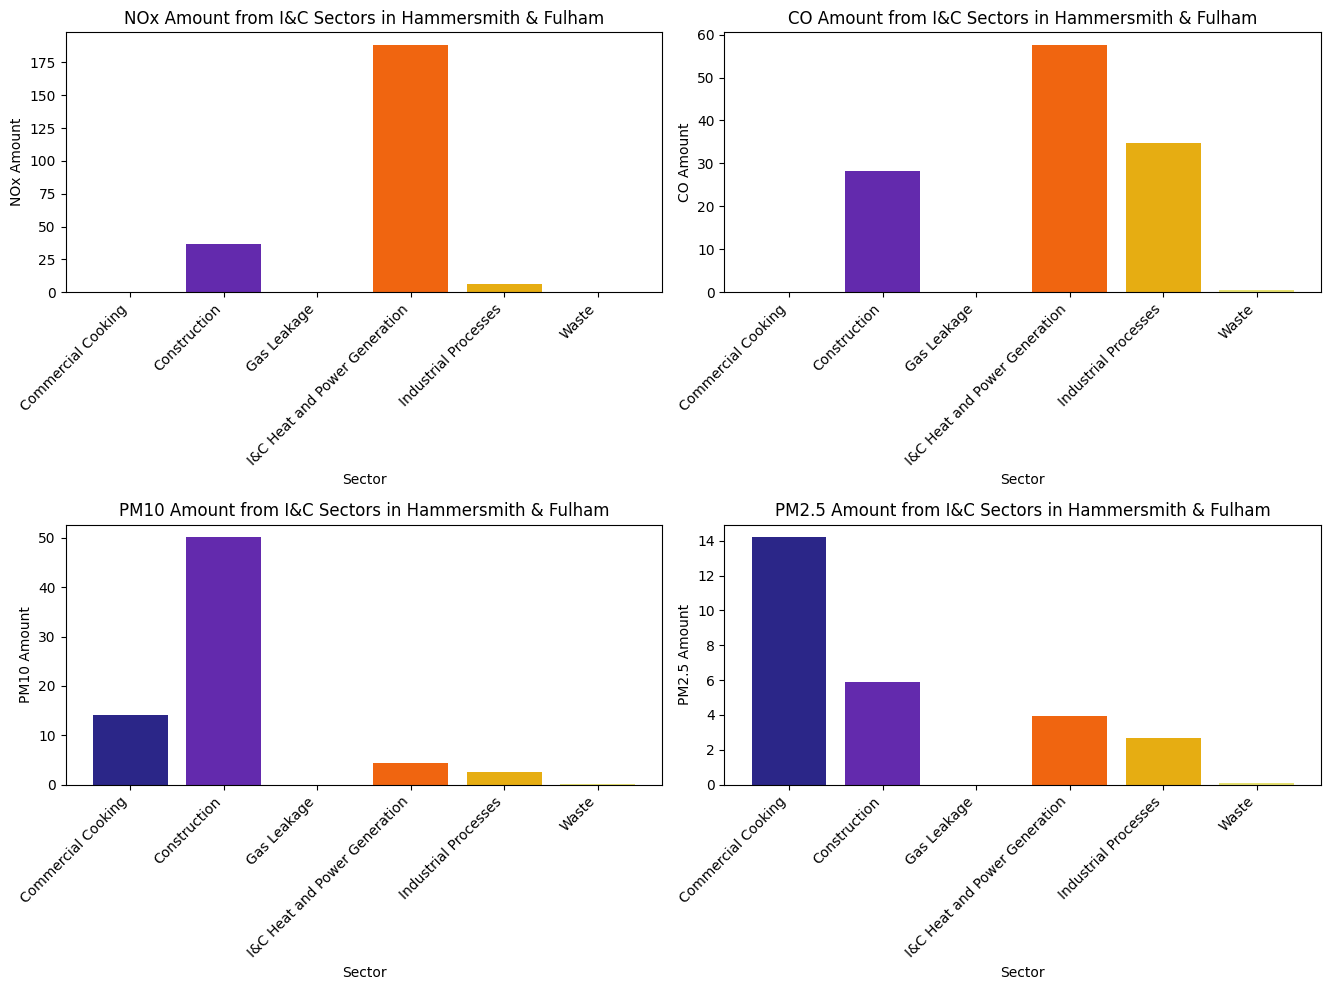

In [188]:
# Creating dataframes to plot on graph
IC_hf_nox_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
IC_hf_n2o_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
IC_hf_co_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
IC_hf_pm10_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
IC_hf_pm2_5_2019 = IC_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from industrial and commerical sources
plt.subplot(2,3,1)
plt.bar(IC_hf_nox_2019 ['SECTOR'], IC_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(IC_hf_n2o_2019 ['SECTOR'], IC_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from I&C Sectors in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(IC_hf_co_2019 ['SECTOR'], IC_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(IC_hf_pm10_2019 ['SECTOR'], IC_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(IC_hf_pm2_5_2019 ['SECTOR'], IC_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from I&C Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Heat and Power generation is a huge source of nitrogen oxides (NO and NO2) in this borough as well as other pollutants such as carbon monoxide</li>
        <li>PM2.5 is mostly being produced from commercial cooking and PM10 from construction</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>d) What are the most polluting vehicle types?</h3>
</div>

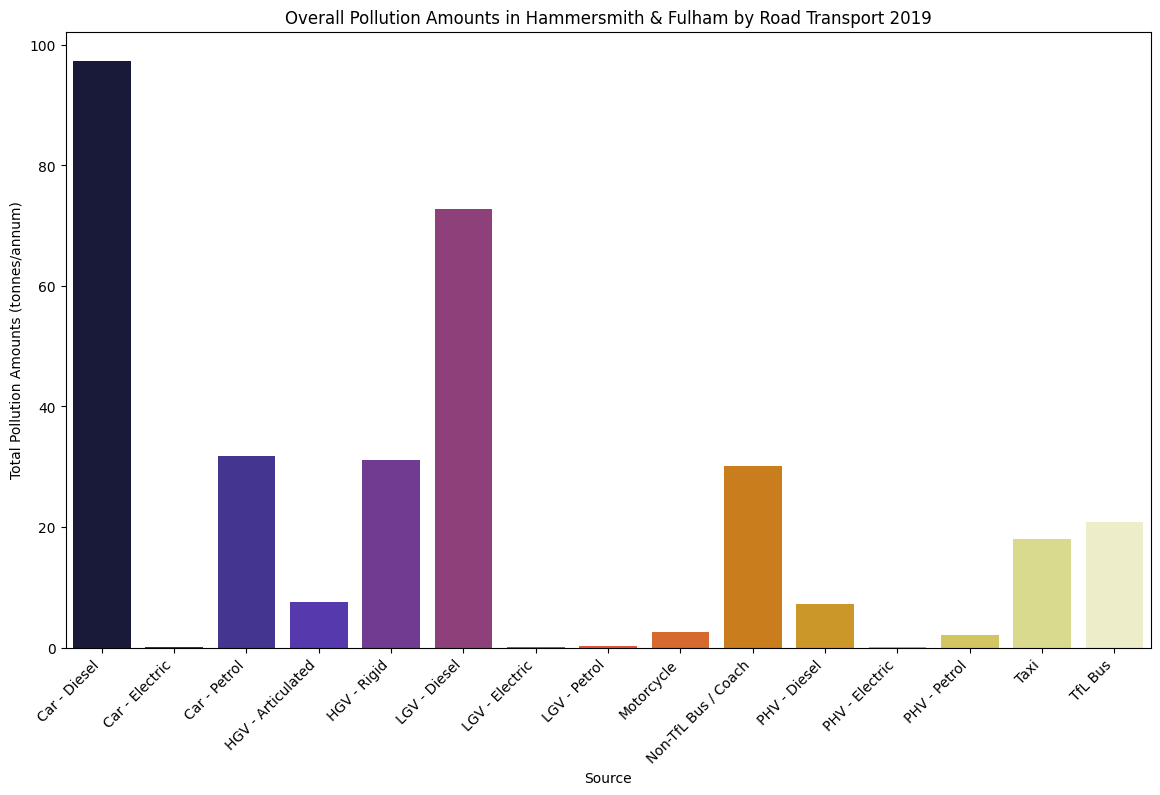

In [184]:
# Creation of dataframe for plotting
road_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['SECTOR'] == 'Road Transport']
road_hammersmith_fulham_source_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['TOTAL POLLUTION'].sum().reset_index()

# Plotting the overall pollution concentrations for each Industrial and Commercial sector
plt.figure(figsize=(14, 8))
sns.barplot(x=road_hammersmith_fulham_source_2019['SOURCE'], y=road_hammersmith_fulham_source_2019['TOTAL POLLUTION'], hue=road_hammersmith_fulham_source_2019['SOURCE'], palette='CMRmap')
plt.xlabel('Source')
plt.ylabel('Total Pollution Amounts (tonnes/annum)')
plt.title('Overall Pollution Amounts in Hammersmith & Fulham by Road Transport 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Diesel vehicles (carsa dn LGVs) were the biggest polluters in Hammersmith which is consistent with data for Greater London</li>
        <li>TFL buses are polluting less than non-TFL buses and coaches</li>
        <li>Although much cleaner than diesel cars, petrol cars still produce over 30 tonnes of pollution per year</li>
        <li>HGVs collectively produce approcimately 40 tonnes per year.</li>
    </ul>
</div>

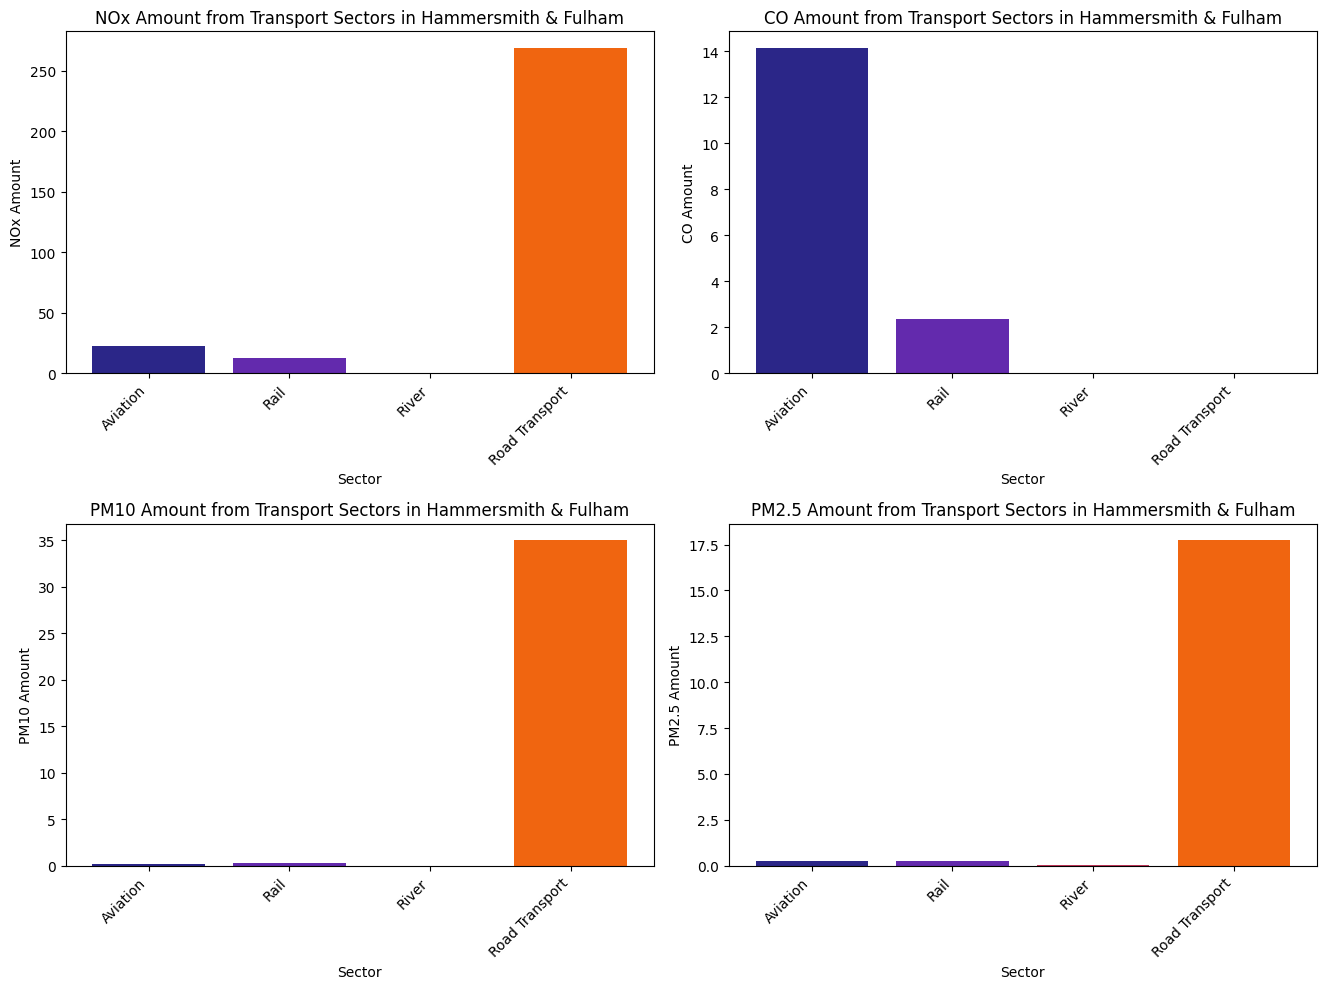

In [191]:
# Filtering data
transport_hammersmith_fulham_2019 = hammersmith_fulham_2019[hammersmith_fulham_2019['MAIN SOURCE CATEGORY'] == 'Transport']
transport_hammersmith_fulham_source_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['TOTAL POLLUTION'].sum().reset_index()

# Creating dataframes to plot graphs
transport_hf_nox_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['NOX'].sum().reset_index()
transport_hf_n2o_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['N2O'].sum().reset_index()
transport_hf_co_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['CO'].sum().reset_index()
transport_hf_pm10_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM10'].sum().reset_index()
transport_hf_pm2_5_2019 = transport_hammersmith_fulham_2019.groupby('SECTOR')['PM2_5'].sum().reset_index()

plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from transport sources
plt.subplot(2,3,1)
plt.bar(transport_hf_nox_2019 ['SECTOR'], transport_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(transport_hf_n2o_2019 ['SECTOR'], transport_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from Transport Sectors in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(transport_hf_co_2019 ['SECTOR'], transport_hf_co_2019['CO'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('CO Amount')
plt.title('CO Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,4)
plt.bar(transport_hf_pm10_2019 ['SECTOR'], transport_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,5)
plt.bar(transport_hf_pm2_5_2019 ['SECTOR'], transport_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Transport Sectors in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Road transport is by far the biggest producer of air pollutants</li>
        <li>Rail is much cleaner than road travel- how can this be used more?</li>
        <li>Although aviation is a big producer of carbon monoxide which has an impact on greenhouse gases, it is not a big producer of air pollutants such as PM2.5 AND PM10. It produces a small amount of nitrogen oxides.</li>
    </ul>
</div>

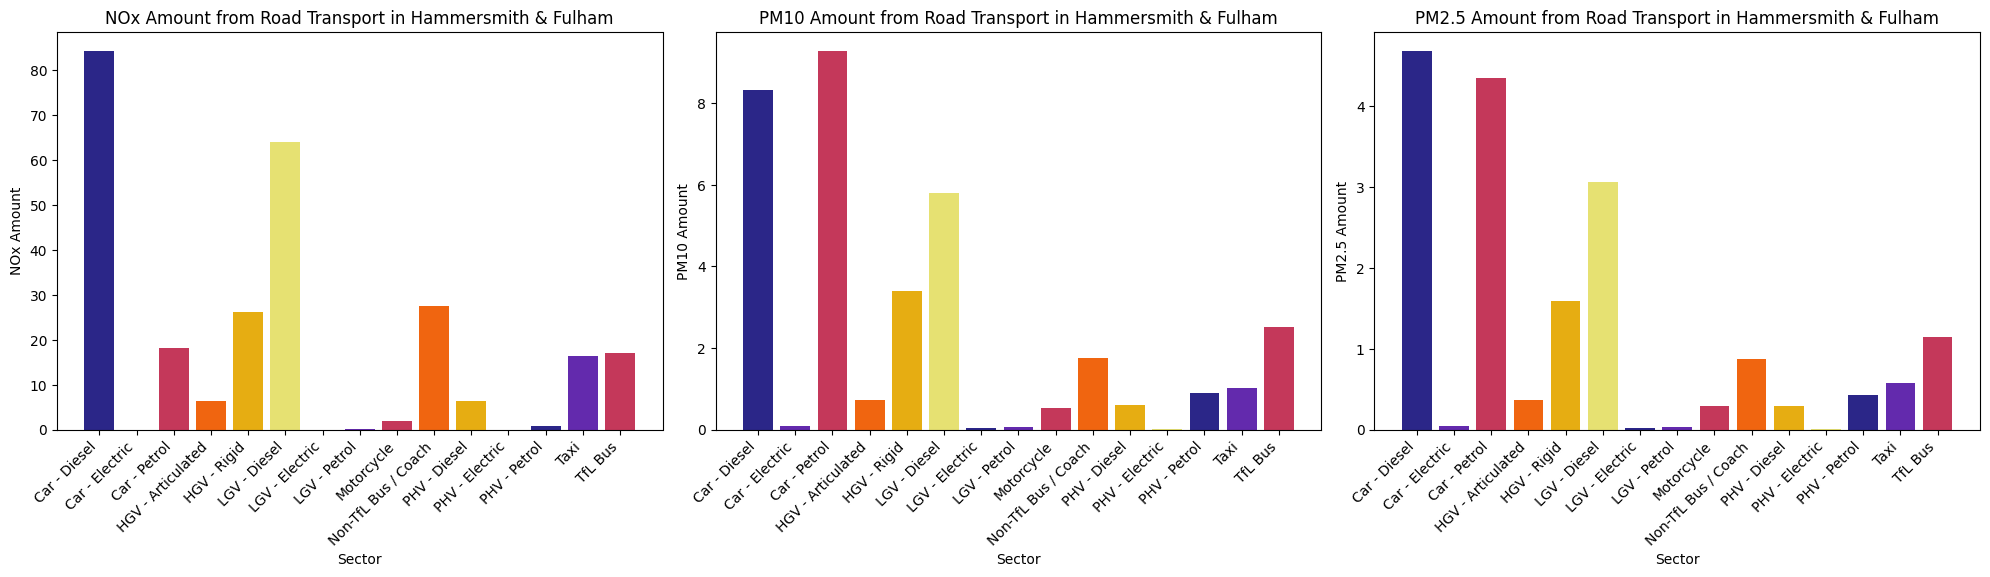

In [196]:
# Creating dataframes to plot graph
road_hf_nox_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['NOX'].sum().reset_index()
road_hf_n2o_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['N2O'].sum().reset_index()
road_hf_co_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['CO'].sum().reset_index()
road_hf_pm10_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM10'].sum().reset_index()
road_hf_pm2_5_2019 = road_hammersmith_fulham_2019.groupby('SOURCE')['PM2_5'].sum().reset_index()


plt.figure(figsize=(20, 10))
palette_color = sns.color_palette('CMRmap') 

# Plotting subplots for each pollutant showing production from road transport sources
plt.subplot(2,3,1)
plt.bar(road_hf_nox_2019['SOURCE'], road_hf_nox_2019['NOX'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('NOx Amount')
plt.title('NOx Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# plt.subplot(2,3,2)
# plt.bar(road_hf_n2o_2019['SOURCE'], road_hf_n2o_2019['N2O'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('N2O Amount')
# plt.title('N2O Amount from Road Transport in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# plt.subplot(2,3,3)
# plt.bar(road_hf_co_2019['SOURCE'], road_hf_co_2019['CO'], color=palette_color)
# plt.xlabel('Sector')
# plt.ylabel('CO Amount')
# plt.title('CO Amount from Road Transport in Hammersmith & Fulham')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

plt.subplot(2,3,2)
plt.bar(road_hf_pm10_2019['SOURCE'], road_hf_pm10_2019['PM10'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM10 Amount')
plt.title('PM10 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2,3,3)
plt.bar(road_hf_pm2_5_2019['SOURCE'], road_hf_pm2_5_2019['PM2_5'], color=palette_color)
plt.xlabel('Sector')
plt.ylabel('PM2.5 Amount')
plt.title('PM2.5 Amount from Road Transport in Hammersmith & Fulham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Although petrol cars produce less nitrogen oxides than diesel cars, they are a big contributor of particulate matter (PM10 and PM2.5)</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>e) Is there a correlation between weather and levels of pollutants?</h3>
</div>

<div class="blue small-padding">
    <strong>Notes</strong>
    <ul>
        <li>Data from weather_aq and weather_aq_AQE is taken from a location with a busy road that is near a number of schools</li>
        <li>weather_aq is a merge of API data for air quality and weather</li>
        <li>weather_aq_AQE is a merge of Air Quality England (AQE) data on air quality and API weather data</li>
        <li>The data from AQE is verified and is collected from a measuring station. API data is taken from satellites</li>
        <li>AQE data should therefore be more reliable, however it originally contained a large amount of NaN values which had to be filled</li>
        <li>The following visualisations will compare both sets of data and check for patterns</li>
    </ul>
</div>

In [139]:
print(weather_aq.columns)
print(weather_aq_AQE.columns)

Index(['date_time', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3', 'temp_C', 'percent_humidity', 'precipitation', 'rain',
       'snowfall', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction', 'day', 'month', 'hour'],
      dtype='object')
Index(['date_time', 'PM10', 'NO', 'NO2', 'NOXasNO2', 'O3', 'PM25', 'time',
       'temp_C', 'percent_humidity', 'precipitation', 'rain', 'snowfall',
       'surface_pressure', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction', 'day', 'month', 'hour'],
      dtype='object')


In [140]:
heatmap_1 = ['no2', 'o3', 'pm2_5', 'pm10', 'temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']
heatmap_2 = ['NO2', 'O3', 'PM25', 'PM10','temp_C', 'percent_humidity', 'precipitation', 'surface_pressure', 'wind_speed_10m']

<Axes: >

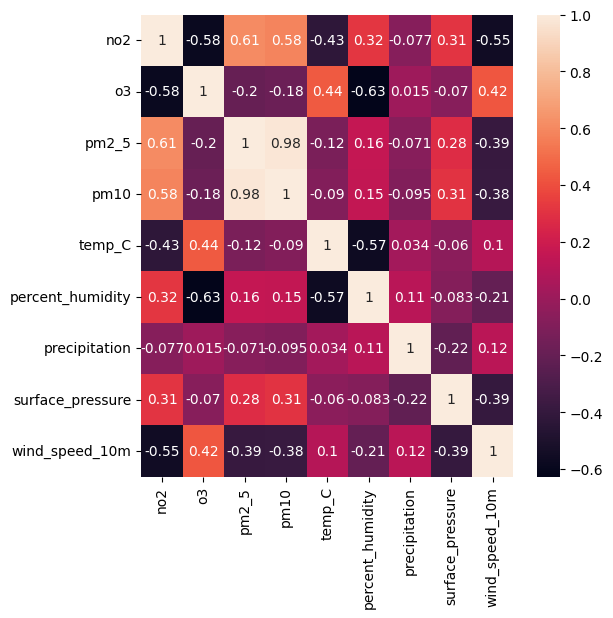

In [141]:
# Correlation between API air quality data and weather data
heatmap_data = weather_aq[heatmap_1]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<Axes: >

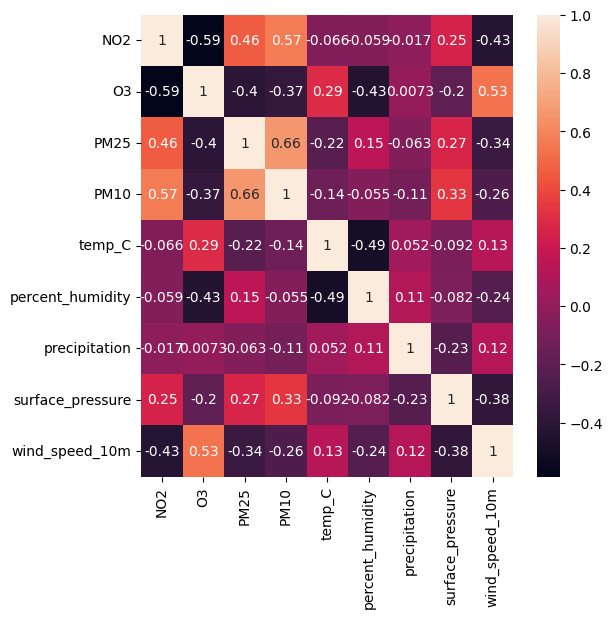

In [142]:
# Correlation between AQE air quality data and weather data
heatmap_data = weather_aq_AQE[heatmap_2]
plt.figure(figsize = (6,6))
correlation_matrix = heatmap_data.corr()
sns.heatmap(data = correlation_matrix, annot = True)

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a correlation between levels of no2, pm2.5 and pm10</li>
        <li>There is a negative correlation between o3 and other pollutants</li>
        <li>Both sets of data show a negative correlation between humidity and o3</li>
        <li>Boths sets of data show a negative correlation between wind speed and no2, pm2.5 and pm10</li>
        <li>API data shows a negative correlation between temperature and no2 but this cannot be seen in the Air Quality England data set</li>
        <li>There is no correlation between other weather types and pollutants</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>f) Does time of day affect levels of pollutants?</h3>
</div>

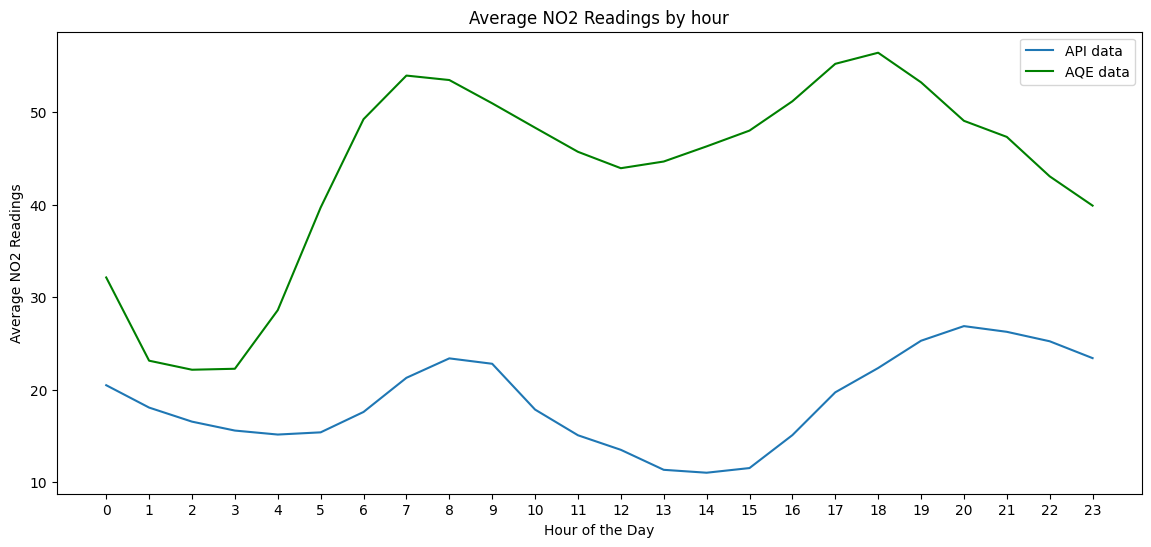

In [143]:
# NO2 data
average_by_hour = weather_aq.groupby('hour').no2.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').NO2.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.no2.tolist()
y_2 = average_by_hour_2.NO2.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label='API data')
plt.plot(x,y_2, color='green', label='AQE data')
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average NO2 Readings')
plt.title('Average NO2 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Average readings from AQE are much higher than API data</li>
        <li>Both sets of data show a fall in pollutant levels between midnight and 4am and another smaller dip between approx. 9am and approx. 3pm</li>
        <li>The lowest levels during waking hours are at spprox. 1pm</li>
        <li>There are two peaks in levels at approx. 7-8am and 5-6pm, in line with rush hour times.</li>
        <li>The Air Quality England data shows that levels are above the UK target of 40µg/m3 for NO2 between 5am and midnight</li>
    </ul>
</div>

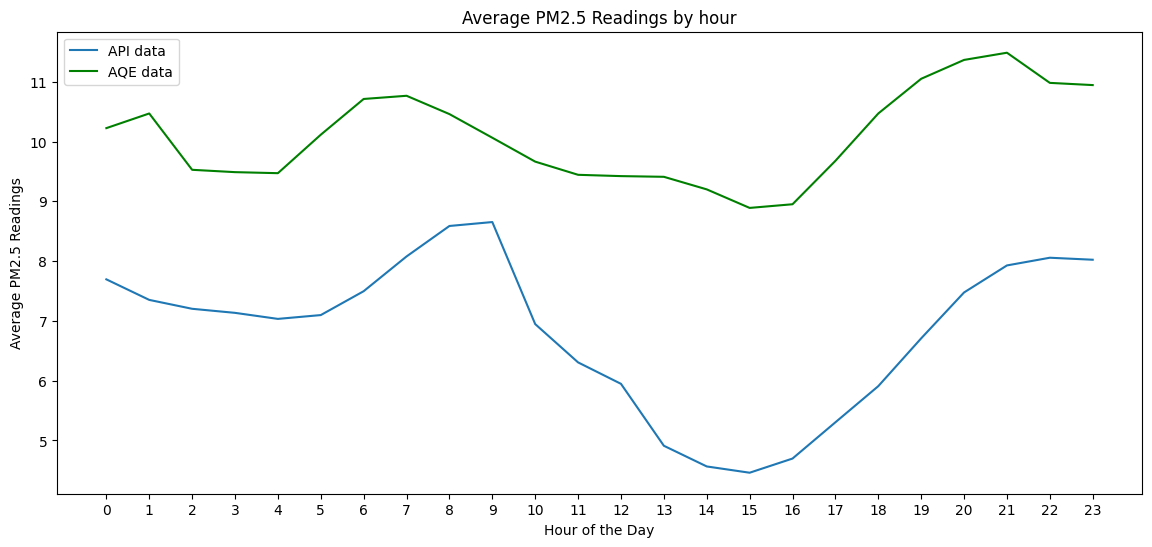

In [144]:
# pm2.5 data
average_by_hour = weather_aq.groupby('hour').pm2_5.mean().to_frame()
average_by_hour_2 = weather_aq_AQE.groupby('hour').PM25.mean().to_frame()
x = average_by_hour.index.tolist()
y = average_by_hour.pm2_5.tolist()
y_2 = average_by_hour_2.PM25.tolist()
plt.figure(figsize=(14, 6))
plt.plot(x, y, label="API data")
plt.plot(x, y_2, color='green', label="AQE data")
plt.xticks(ticks=x, labels=[str(hour) for hour in x])

plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Readings')
plt.title('Average PM2.5 Readings by hour')
plt.legend()
# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Levels of PM2.5 follow a similar pattern to NO2</li>
        <li>Pollutant levels are again much higher accoridng to the AQE data</li>
        <li>According to AQE data there is a more prolonged, less significant fall in levels between 7am and 4pms</li>
        <li>These levels meet current Air Quality objective of 20µg/m3 but exceed target of 10µg/m3 at multiple times of day</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>g) Are levels of pollutants different at different times of year?</h3>
</div>

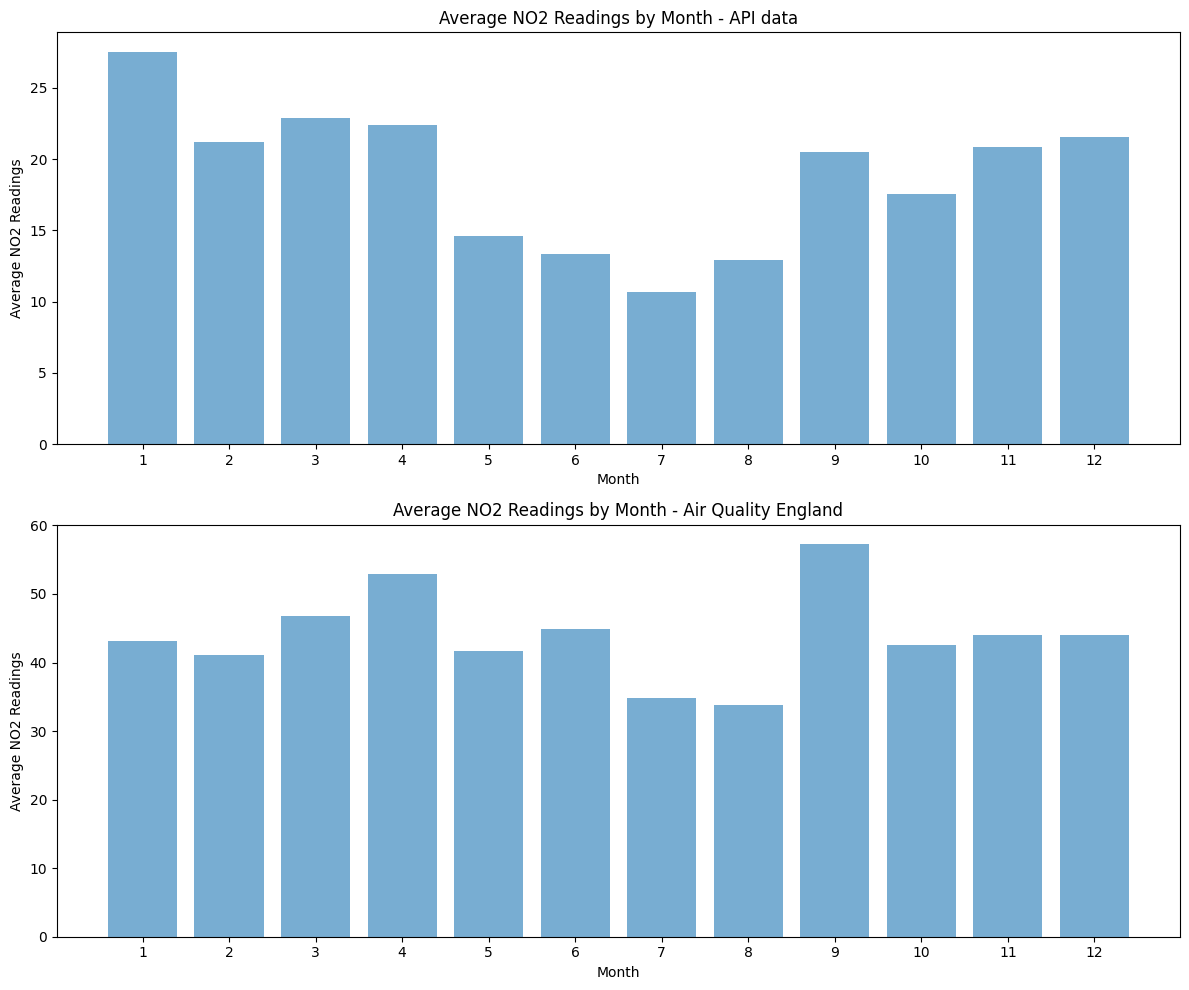

In [145]:
# NO2 data
average_by_month = weather_aq.groupby('month').no2.mean().to_frame()
average_by_month_2 = weather_aq_AQE.groupby('month').NO2.mean().to_frame()
x = average_by_month.index.tolist()
y = average_by_month.no2.tolist()
y_2 = average_by_month_2.NO2.tolist()
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the first bar chart
axs[0].bar(x, y, alpha=0.6)
axs[0].set_xticks(x)
axs[0].set_xticklabels([str(month) for month in x])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average NO2 Readings')
axs[0].set_title('Average NO2 Readings by Month - API data')

# Plot the second bar chart
axs[1].bar(x, y_2, alpha=0.6)
axs[1].set_xticks(x)
axs[1].set_xticklabels([str(month) for month in x])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average NO2 Readings')
axs[1].set_title('Average NO2 Readings by Month - Air Quality England')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both sets of data show a dip in the summer months July-August though this is less pronounced in the AQE data</li>
        <li>AQE data shows that NO2 levels are highest on average in September and also high in April</li>
    </ul>
</div>

<div class="yellow small-padding">
    <h3>h) Are levels of pollutants different on different days?</h3>
</div>

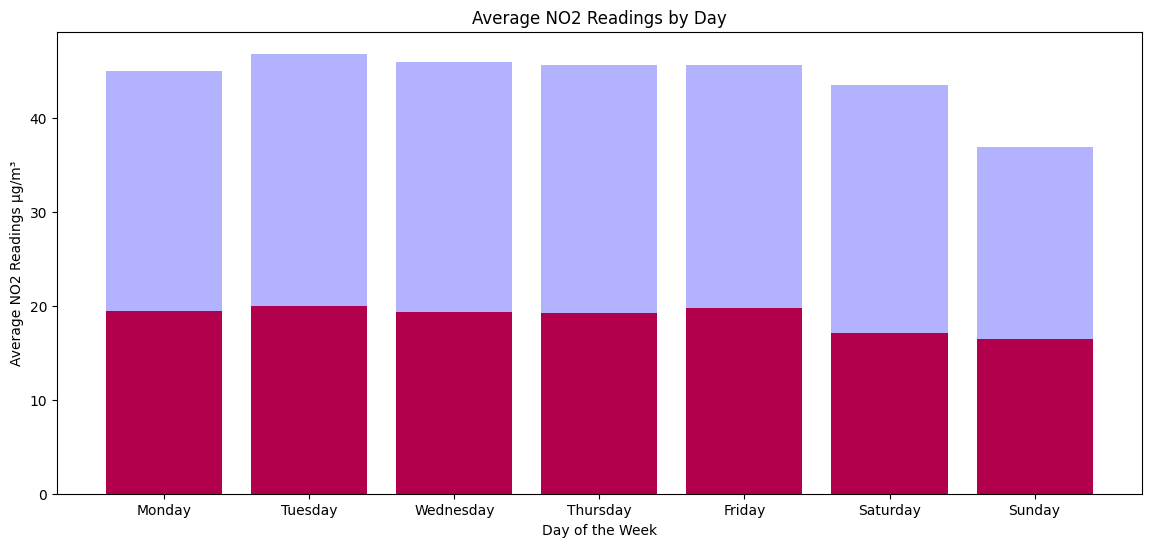

In [146]:
average_no2_by_day = weather_aq.groupby('day').no2.mean().to_frame()
average_no2_by_day_AQE = weather_aq_AQE.groupby('day').NO2.mean().to_frame()
x = average_no2_by_day.index.tolist()
y = average_no2_by_day.no2.tolist()
y_2 = average_no2_by_day_AQE.NO2.tolist()

plt.figure(figsize=(14, 6))
plt.bar(x, y, color='red')
plt.bar(x, y_2, color='blue', alpha=0.3)
plt.xticks(ticks=x, labels=['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])

plt.xlabel('Day of the Week')
plt.ylabel('Average NO2 Readings μg/m³')
plt.title('Average NO2 Readings by Day')


plt.show()

<div class="blue small-padding">
    <strong>Observations</strong>
    <ul>
        <li>Both data sets agree that there is a higher level of NO2 throughout the week and a dip at weekends</li>
        <li>NO2 levels are at their lowest on Sundays</li>
        <li>NO2 levels are at their highest on Tuesdays but are of similar levels throughout the week</li>
        <li>NO2 levels are above the 40μg/m³ yearly mean target from Monday-Saturday according to AQE data</li>
    </ul>
</div>

<div class="orange extra-padding">
    <h2>2. What has been the impact of schemes such as ULEZ and Covid on reducing air pollution and how can this inform future policies?</h2>
</div>

<div class="orange extra-padding">
    <h2>3. What is the impact of air pollution on our health and the NHS?</h2>
</div>

<div class="yellow small-padding">
    <h3>How does air pollution impacting the health of people in Hammersmith?</h3>
</div>

<div class="blue small-padding">
    <strong>Notes</strong>
    <ul>
        <li>The health data in this section has been cleaned previously and used in reports</li>
        <li>The data looks at two scenarios:
            <ol>
                <li>'scenario 0': where the government makes no chnages and does not implement an air quality strategy</li>
                <li>'scenario 2': where the government implements The Ultra Low Emission Zone (ULEZ). Data includes modelled air quality improvements resulting from the introduction of the central ULEZ in 2019, the tightening of the     restrictions of the Low Emission Zone (LEZ) in 2020, and the expansion of the ULEZ in 2021, as well as additional policy measures in the period 2016-2024.</li>
            </ol>
        </li>
        <li>Data from 2016 is real incidence data and future dates are modelled data based on different scenarios</li>
    </ul>
</div>

<div class="yellow small-padding">
<h4>What could happen without improved air quality? ('scenario 0')</h4>
</div>

<div class="purple small-padding">
    <h4>Loading and viewing modelled health data</h4>
</div>

In [41]:
file_path = 'data_unclean/PM25/hammersmith-and-fulham-pm25-xlsm-48.xls'
sheet_name = 'Incidence'

df_pm25 = pd.read_excel(file_path, sheet_name=sheet_name)
df_pm25.head()

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,131,1
1,0,2016,childhood asthma,06-17,214,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,345,1


In [4]:
df_pm25.describe()

,Scenario,Year,Incidence,95% CL
count,5040.000000,5040.000000,5040.000000,5040.000000
mean,1.500000,2033.000000,90.504762,0.444444
std,1.118145,10.100507,190.916496,0.630073
min,0.000000,2016.000000,0.000000,0.000000
25%,0.750000,2024.000000,0.000000,0.000000
50%,1.500000,2033.000000,32.000000,0.000000
75%,2.250000,2042.000000,96.000000,1.000000
max,3.000000,2050.000000,1256.000000,3.000000


In [5]:
file_path = 'data_unclean/NO2/hammersmith-and-fulham-no2-xlsm-63.xls'
sheet_name = 'Incidence'

df_no2 = pd.read_excel(file_path, sheet_name=sheet_name)
df_no2.describe()

,Scenario,Year,Incidence,95% CL
count,4340.000000,4340.000000,4340.000000,4340.000000
mean,1.500000,2033.000000,106.858065,0.466820
std,1.118163,10.100669,207.302240,0.644837
min,0.000000,2016.000000,0.000000,0.000000
25%,0.750000,2024.000000,0.000000,0.000000
50%,1.500000,2033.000000,24.000000,0.000000
75%,2.250000,2042.000000,136.250000,1.000000
max,3.000000,2050.000000,1267.000000,3.000000


In [6]:
df_no2.head()

,Scenario,Year,Disease,AgeGroup,Incidence,95% CL
0,0,2016,childhood asthma,0-5,187,1
1,0,2016,childhood asthma,06-17,130,1
2,0,2016,childhood asthma,18-64,0,0
3,0,2016,childhood asthma,65+,0,0
4,0,2016,childhood asthma,total,317,1


In [7]:
file_path = 'data_unclean/PM25/hammersmith-and-fulham-pm25-xlsm-48.xls'

sheet_name = 'Incidence Cases Avoided'

df_AVOIDED = pd.read_excel(file_path, sheet_name=sheet_name)

In [8]:
file_path = 'data_unclean/NO2/hammersmith-and-fulham-no2-xlsm-63.xls'

sheet_name = 'Incidence Cases Avoided'

df_AVOIDED_NO2 = pd.read_excel(file_path, sheet_name=sheet_name)

<div class="purple small-padding">
    <h4>Hammersmith PM2.5 incidence predictions for scenario 0</h4>
</div>

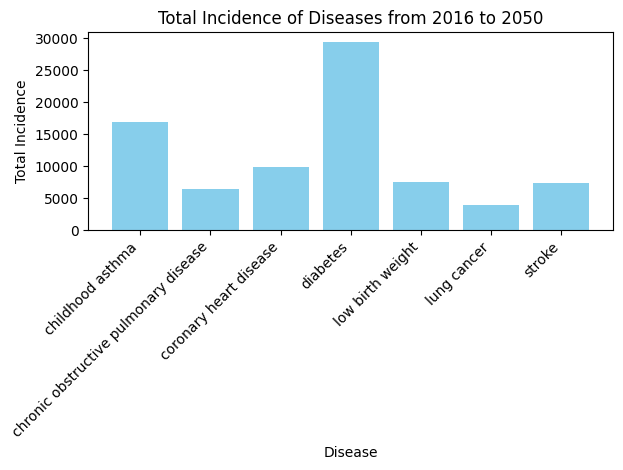

In [9]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
df_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()

df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [227]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
total_incidence = grouped_data.sum(axis=1)
total_incidence


Disease
total    40797
dtype: int64

<Figure size 1200x800 with 0 Axes>

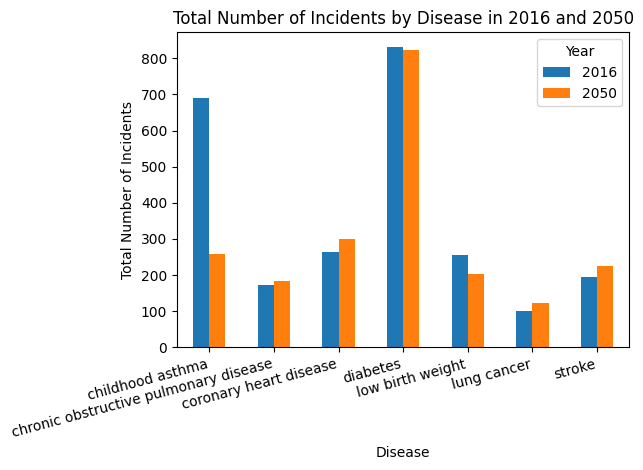

In [10]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = df_incidence_s0[(df_incidence_s0['Year']=='2016')| (df_incidence_s0['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

<div class="purple small-padding">
    <h4>Hammersmith NO2 incidence predictions for scenario 0</h4>
</div>

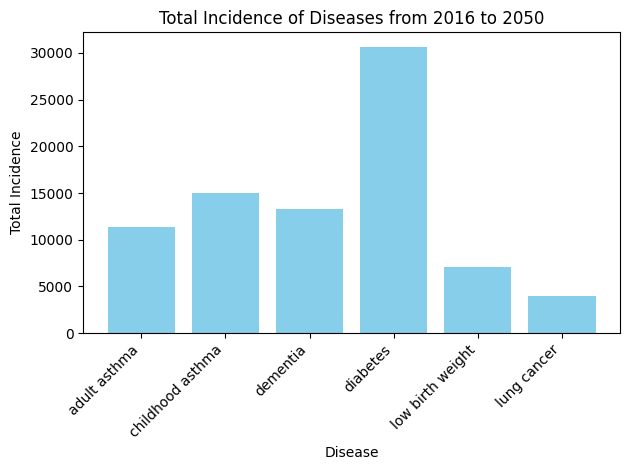

In [11]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
df_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()

df_incidence_s0['Year'] = pd.to_datetime(df_incidence_s0['Year'], format='%Y')

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [12]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = df_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']

total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    40703
dtype: int64

<Figure size 1200x800 with 0 Axes>

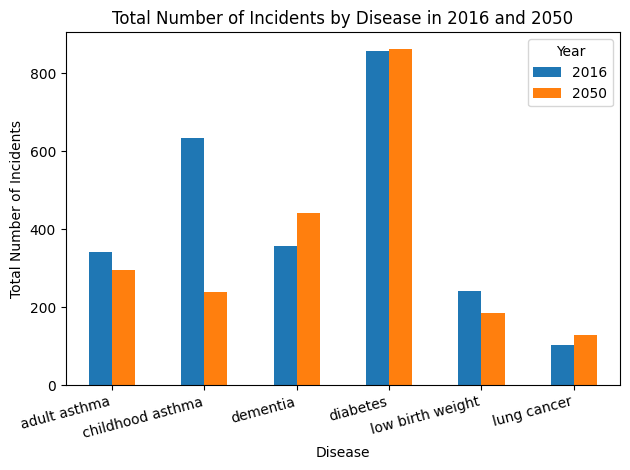

In [13]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = df_incidence_s0[(df_incidence_s0['Year']=='2016')| (df_incidence_s0['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<div class="yellow small-padding">
 <h3>How could schemes such as ULEZ reduce air pollution reduce hospital admissions?</h3>
</div>

<div class="purple small-padding">
    <h4>Hammersmith PM2.5 incidence predictions for scenario 2</h4>
</div>

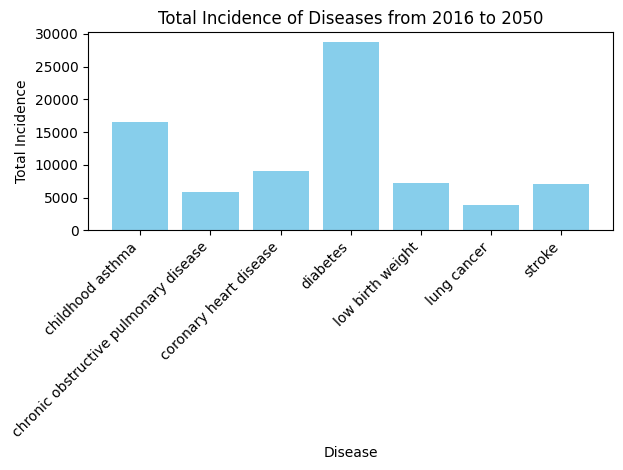

In [14]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
df_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

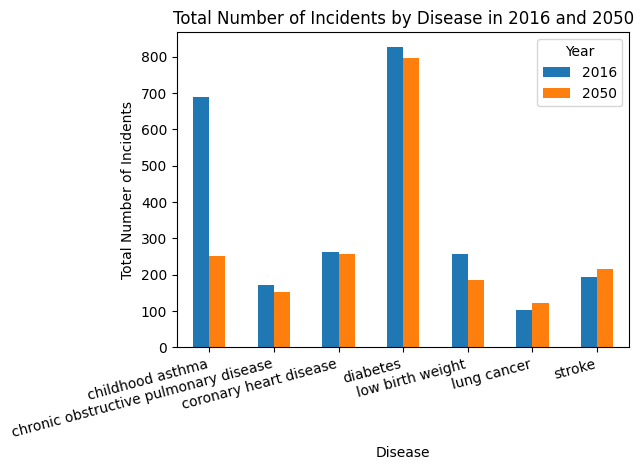

In [15]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE SCENARIO 2

df_selected_years = df_incidence_s2[(df_incidence_s2['Year']=='2016')| (df_incidence_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [17]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']

total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    39188
dtype: int64

<div class="purple small-padding">
    <h5>Scenario 2 incidences avoided for Hammersmith PM2.5</h5>
</div>

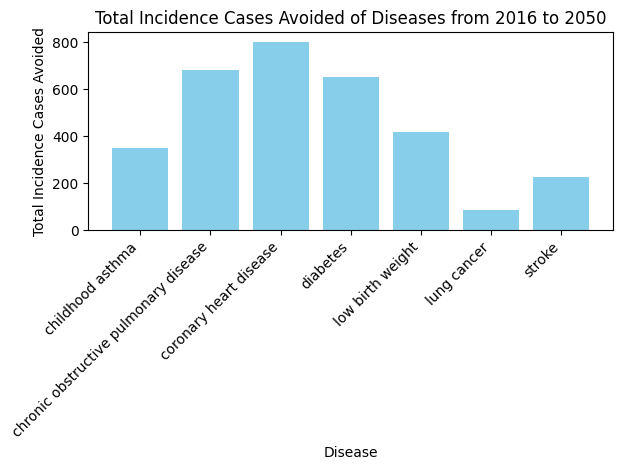

In [18]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

PM25_avoided_s2 = df_AVOIDED[df_AVOIDED['Scenario'] == 2].copy()
PM25_avoided_s2['Year'] = pd.to_datetime(df_AVOIDED['Year'], format='%Y')

grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [19]:
# TOTAL ALL DISEASES
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1609
dtype: int64

<Figure size 1200x800 with 0 Axes>

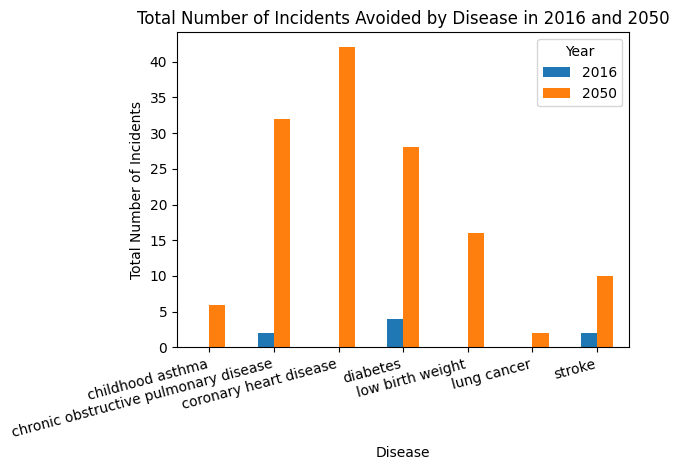

In [20]:
# DIFFERENCE IN INCIDENCES AVOIDED BETWEEN 2016 AND 2050 FOR EACH DISEASE 

df_selected_years = PM25_avoided_s2[(PM25_avoided_s2['Year']=='2016')| (PM25_avoided_s2['Year']=='2050')]

grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents Avoided by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease comparing scenario 0 and 2 PM2.5 data</h5>
</div>

In [21]:
# Get totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')

grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
childhood asthma                         16536
chronic obstructive pulmonary disease     5788
coronary heart disease                    9018
diabetes                                 28788
low birth weight                          7188
lung cancer                               3928
stroke                                    7130
dtype: int64 Disease
childhood asthma                         16888
chronic obstructive pulmonary disease     6468
coronary heart disease                    9820
diabetes                                 29440
low birth weight                          7606
lung cancer                               4014
stroke                                    7358
dtype: int64


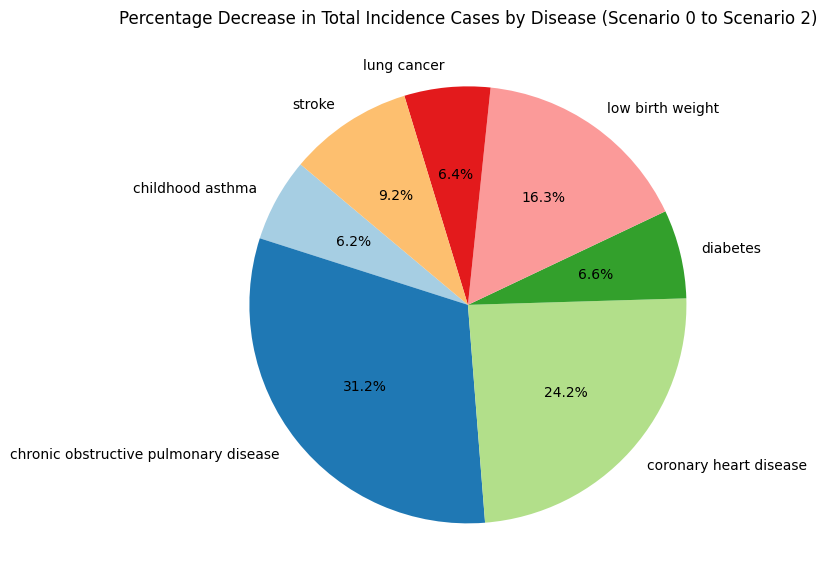

In [22]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()

In [23]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)

Absolute Change in Total Incidence Cases for Each Disease:
Disease
childhood asthma                        -352
chronic obstructive pulmonary disease   -680
coronary heart disease                  -802
diabetes                                -652
low birth weight                        -418
lung cancer                              -86
stroke                                  -228
dtype: int64


In [24]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['childhood asthma', 'coronary heart disease', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease)

Total Number of Decrease for Selected Diseases:
-1240


Disease
total    39188
dtype: int64 Disease
total    40797
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.943917
dtype: float64


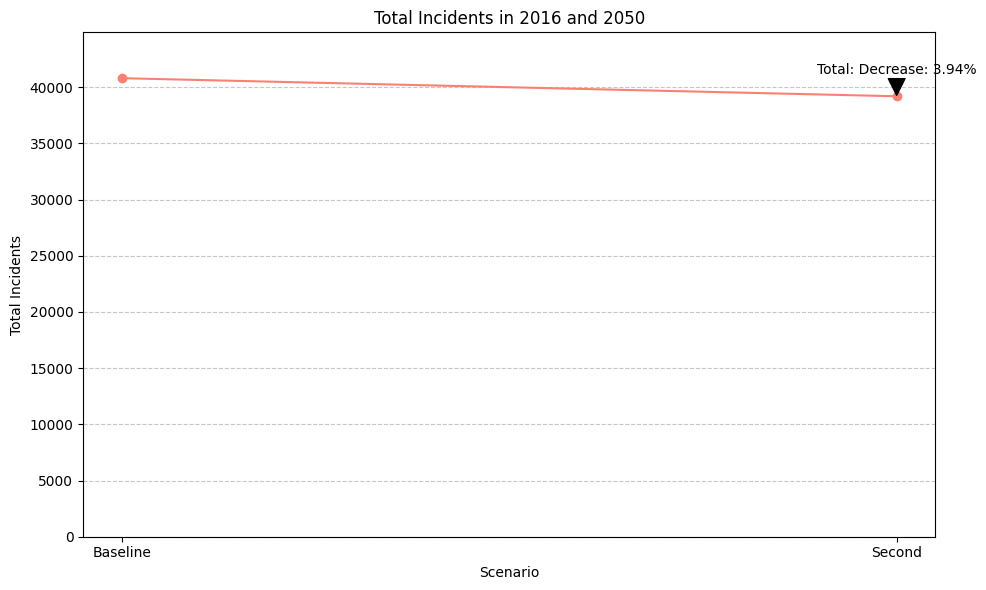

In [26]:
# Percentage change for all diseases comparing scenario 0 and 2 for pm2.5

# Get totals for all diseases from 2016-2050 for scenario 0
PM25_incidence_s0 = df_pm25[df_pm25['Scenario'] == 0].copy()
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)


# Get totals for all diseases from 2016-2050 for scenario 2
PM25_incidence_s2 = df_pm25[df_pm25['Scenario'] == 2].copy()
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()

<div class="purple small-padding">
    <h4>Hammersmith NO2 incidence predictions for scenario 2</h4>
</div>

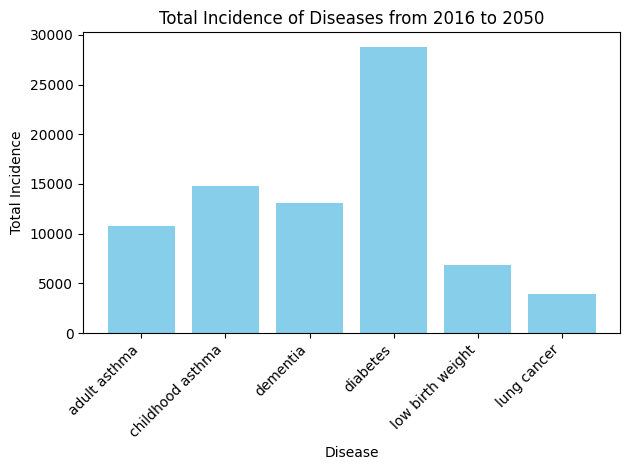

In [27]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
df_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()

df_incidence_s2['Year'] = pd.to_datetime(df_incidence_s2['Year'], format='%Y')

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']


total_incidence_per_disease = grouped_data.sum(axis=1)

fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

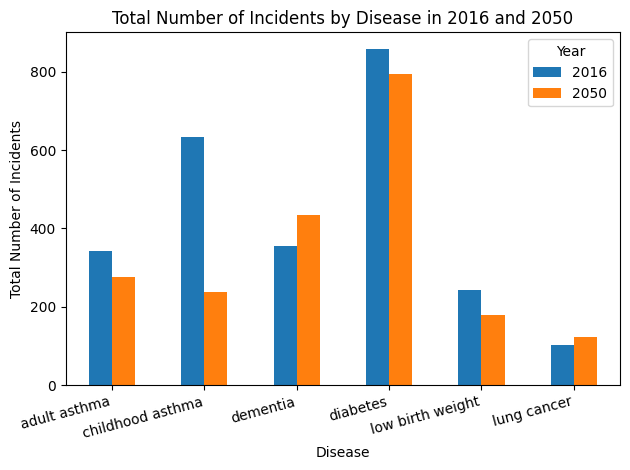

In [28]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCE SCENARIO 2

df_selected_years = df_incidence_s2[(df_incidence_s2['Year']=='2016')|(df_incidence_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right') 
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

In [29]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = df_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    39152
dtype: int64

<div class="purple small-padding">
    <h5>Scenario 2 incidences avoided for Hammersmith</h5>
</div>

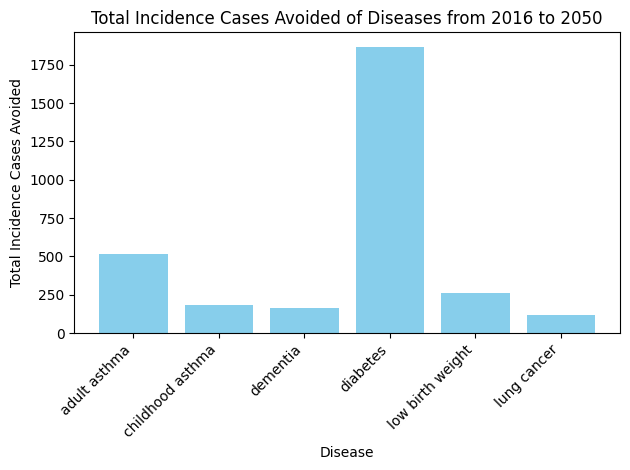

In [30]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

# Total number for each disease by age from 2016-2050 INCIDENCE
NO2_avoided_s2 = df_AVOIDED_NO2[df_AVOIDED_NO2['Scenario'] == 2].copy()
NO2_avoided_s2['Year'] = pd.to_datetime(df_AVOIDED_NO2['Year'], format='%Y')
NO2_avoided_s2

grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

grouped_avoided
total_incidence_per_disease = grouped_avoided.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticks(range(len(total_incidence_per_disease.index)))
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [31]:
# TOTAL ALL DISEASES
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1551
dtype: int64

<Figure size 1200x800 with 0 Axes>

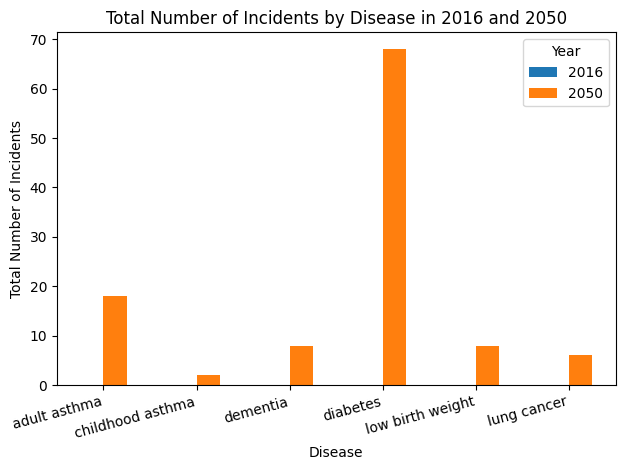

In [32]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCES AVOIDED

df_selected_years = NO2_avoided_s2[(NO2_avoided_s2['Year']=='2016')|(NO2_avoided_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  
plt.show()

In [33]:
# TOTAL ALL DISEASES
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = NO2_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    1551
dtype: int64

<Figure size 1200x800 with 0 Axes>

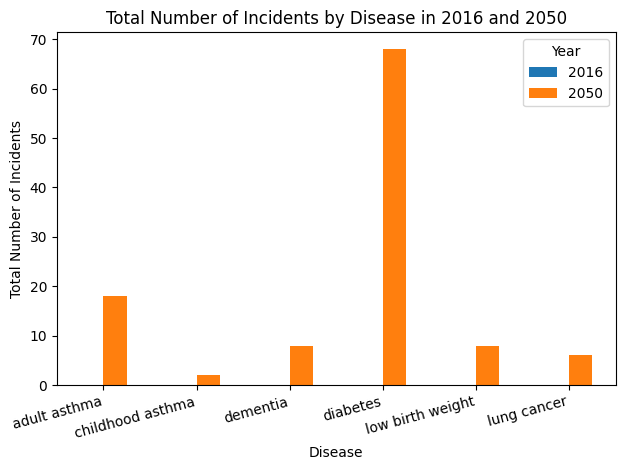

In [34]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE INCIDENCES AVOIDED

df_selected_years = NO2_avoided_s2[(NO2_avoided_s2['Year']=='2016')| (NO2_avoided_s2['Year']=='2050')]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease for pm2.5 in Hammersmith comparing scenario 0 and 2</h5>
</div>

In [35]:
# Get totals of each disease from 2016-2050 for scenario 0
NO2_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()
NO2_incidence_s0['Year'] = pd.to_datetime(NO2_incidence_s0['Year'], format='%Y')

grouped_data_0 = NO2_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals of each disease from 2016-2050 for scenario 2
NO2_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()
NO2_incidence_s2['Year'] = pd.to_datetime(NO2_incidence_s2['Year'], format='%Y')
grouped_data_2 = NO2_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
adult asthma        10816
childhood asthma    14836
dementia            13126
diabetes            28808
low birth weight     6826
lung cancer          3892
dtype: int64 Disease
adult asthma        11332
childhood asthma    15018
dementia            13288
diabetes            30676
low birth weight     7084
lung cancer          4008
dtype: int64


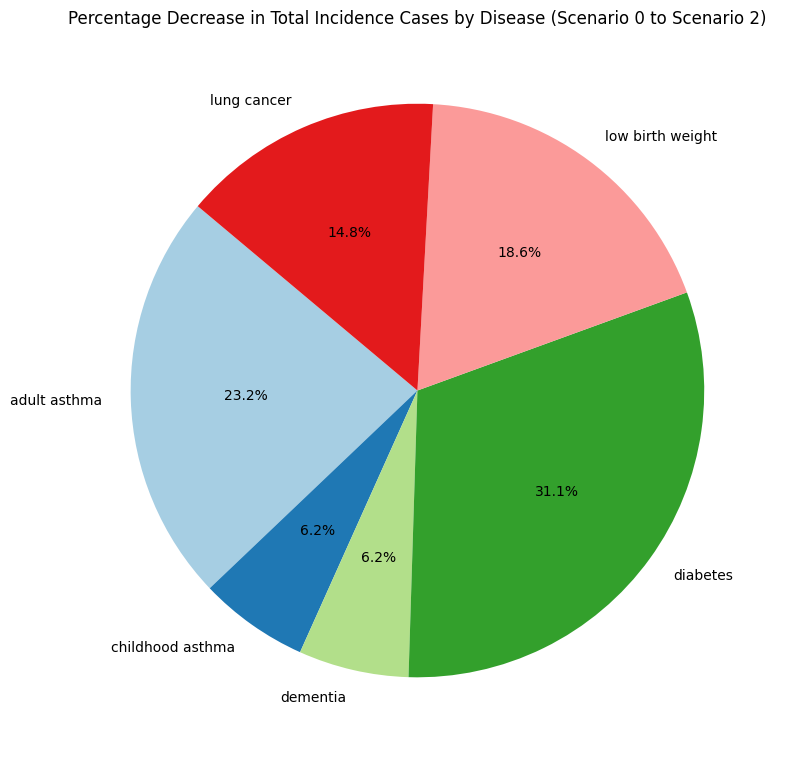

In [36]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()


In [37]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)

Absolute Change in Total Incidence Cases for Each Disease:
Disease
adult asthma        -516
childhood asthma    -182
dementia            -162
diabetes           -1868
low birth weight    -258
lung cancer         -116
dtype: int64


In [38]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['adult asthma', 'childhood asthma', 'dementia', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease)

Total Number of Decrease for Selected Diseases:
-976


<div class="purple small-padding">
    <h5>Percentage decrease/increase per disease for NO2 in Hammersmith comparing scenario 0 and 2</h5>
</div>

Disease
total    39152
dtype: int64 Disease
total    40703
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.81053
dtype: float64


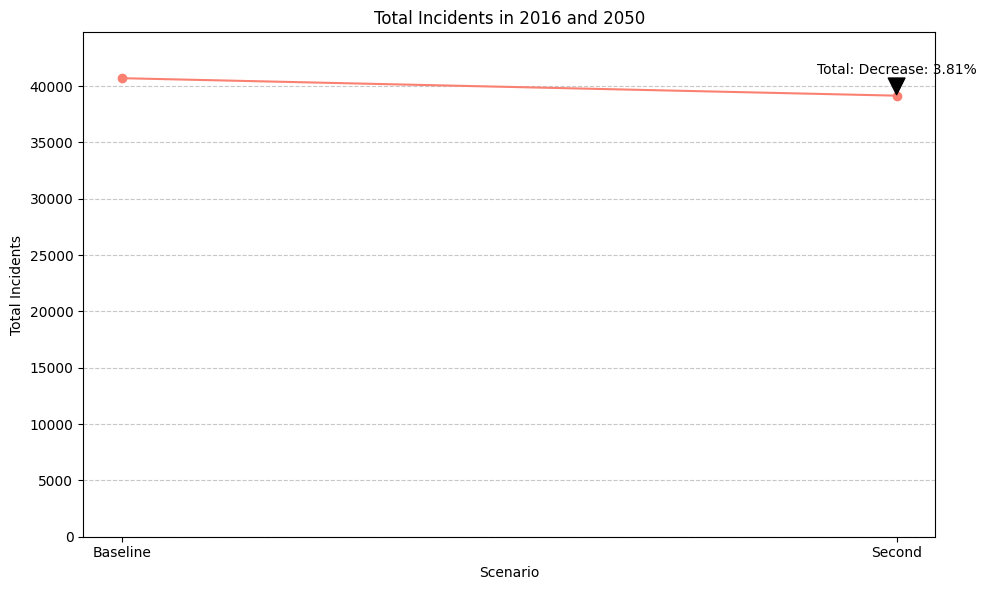

In [40]:
# Get totals for all disease from 2016-2050 for scenario 0
NO2_incidence_s0 = df_no2[df_no2['Scenario'] == 0].copy()
NO2_incidence_s0['Year'] = pd.to_datetime(NO2_incidence_s0['Year'], format='%Y')
grouped_data_0 = NO2_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)

# Get totals totals for all disease from 2016-2050 for scenario 2
NO2_incidence_s2 = df_no2[df_no2['Scenario'] == 2].copy()
NO2_incidence_s2['Year'] = pd.to_datetime(NO2_incidence_s2['Year'], format='%Y')
grouped_data_2 = NO2_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="yellow small-padding">
    <h3>sub questions</h3>
</div>

<div class="blue extra-padding">
    <strong>Observations</strong>
    <ul>
        <li>one</li>
        <li>two</li>
        <li>three</li>
        <li>four</li>
        <li>five</li>
    </ul>
</div>